In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
vehicle = pd.read_csv("vehicles.csv")

In [3]:
vehicle.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [4]:
vehicle.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [7]:
vehicle_1 = vehicle[vehicle["model"].notna() & vehicle["year"].notna() & vehicle["manufacturer"].notna()\
                    & vehicle["price"].notna()\
                    & vehicle["odometer"].notna() & vehicle["price"]!=0]

In [4]:
vehicle_1["age"] = 2021-vehicle_1["year"].astype(int)

/tmp/ipykernel_4072742/2315890347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_1["age"] = 2021-vehicle_1["year"].astype(int)


<AxesSubplot: xlabel='age', ylabel='Count'>

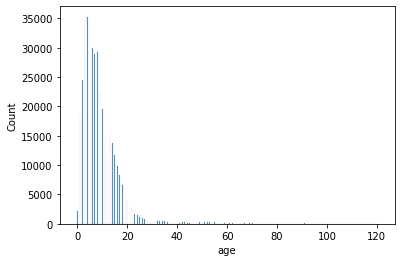

In [17]:
import seaborn as sns
sns.histplot(vehicle_1["age"])

In [9]:
list_1 = list(vehicle_3.sort_values("id",ascending=False).iloc[:10,:].index)
list_1

['f-150',
 'silverado 1500',
 '1500',
 'camry',
 'silverado',
 'accord',
 'wrangler',
 'civic',
 'altima',
 'escape']

In [8]:
df = vehicle_1[vehicle_1["model"]=='silverado 1500']
df["year"] = df["year"].astype(int)
df["age"] = 2021 - df["year"]
df["price"] = df["price"].astype(float)
df.shape

/tmp/ipykernel_4072742/3226963620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = df["year"].astype(int)
/tmp/ipykernel_4072742/3226963620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"] = 2021 - df["year"]
/tmp/ipykernel_4072742/3226963620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

(2175, 27)

In [9]:
from collections import Counter
Counter(df["condition"])

Counter({nan: 1184,
         'good': 300,
         'excellent': 616,
         'like new': 70,
         'fair': 4,
         'new': 1})

In [10]:
Counter(df["fuel"])

Counter({'gas': 2054, nan: 8, 'hybrid': 8, 'other': 101, 'diesel': 4})

In [11]:
Counter(df["cylinders"])

Counter({nan: 826,
         '8 cylinders': 1088,
         '4 cylinders': 69,
         '6 cylinders': 182,
         '10 cylinders': 10})

In [12]:
Counter(df["type"])

Counter({nan: 452,
         'truck': 892,
         'pickup': 794,
         'other': 34,
         'sedan': 1,
         'offroad': 1,
         'SUV': 1})

<AxesSubplot: xlabel='age', ylabel='Count'>

<Figure size 1080x360 with 0 Axes>

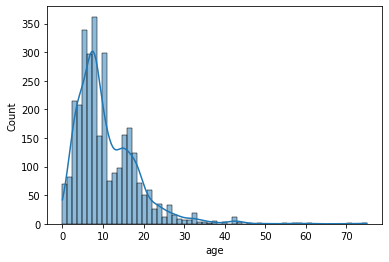

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
fig, ax = plt.subplots()
sns.histplot(df["age"],kde=True,ax=ax)

(-5.0, 50.0)

<Figure size 1080x360 with 0 Axes>

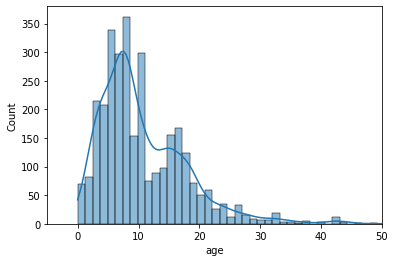

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
fig, ax = plt.subplots()
sns.histplot(df["age"],kde=True,ax=ax)
ax.set_xlim(-5,50)

(-5000.0, 500000.0)

<Figure size 1440x360 with 0 Axes>

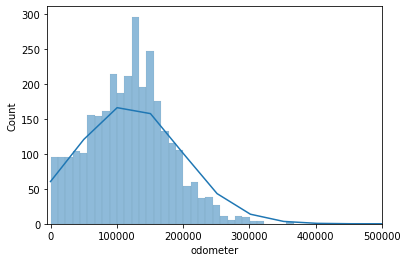

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
fig, ax = plt.subplots()
sns.histplot(df["odometer"],kde=True, ax=ax)
ax.set_xlim(-5000, 500000)

(-5000.0, 300000.0)

<Figure size 1440x360 with 0 Axes>

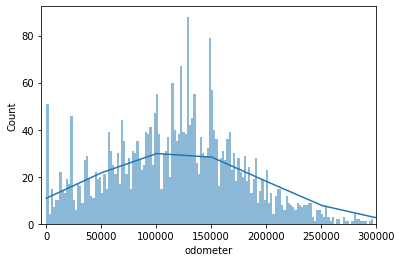

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
fig, ax = plt.subplots()
sns.histplot(df["odometer"],kde=True, ax=ax,binwidth=2000)
ax.set_xlim(-5000, 300000)

/home/yifeisun/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(0.0, 20.0)

<Figure size 1440x360 with 0 Axes>

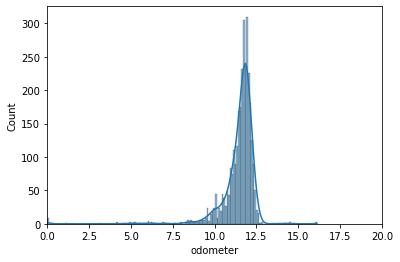

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
logged_odometer = np.log(df["odometer"])
plt.figure(figsize=(20,5))
fig, ax = plt.subplots()
sns.histplot(logged_odometer,kde=True, ax=ax)
ax.set_xlim(0, 20)

<AxesSubplot: xlabel='odometer', ylabel='Count'>

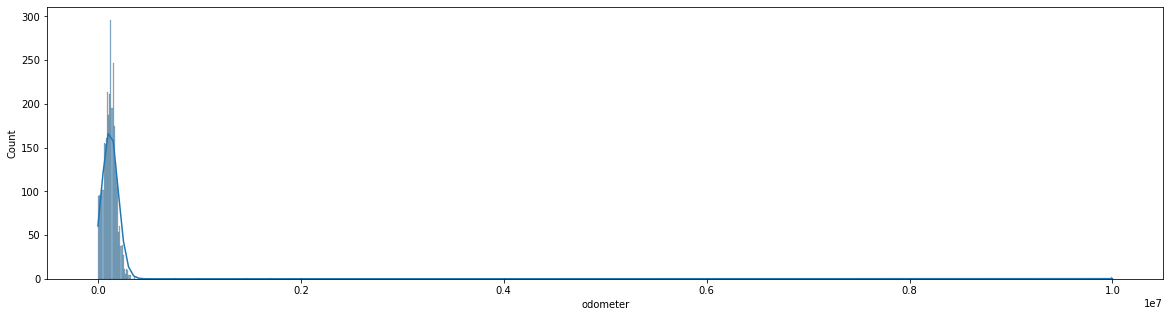

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.histplot(df["odometer"],kde=True)

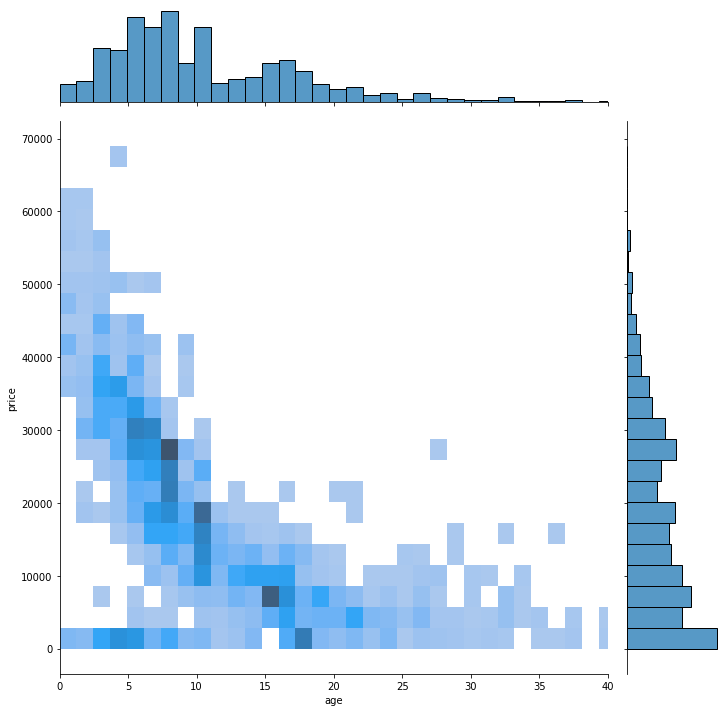

In [69]:
sns.jointplot(x='age',y='price',data=df,kind="hist",height=10,xlim=(0,40))

/tmp/ipykernel_2985797/4078052607.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='age',y='price',data=df,cmap="Reds", shade=True, bw_adjust=.5)


<AxesSubplot: xlabel='age', ylabel='price'>

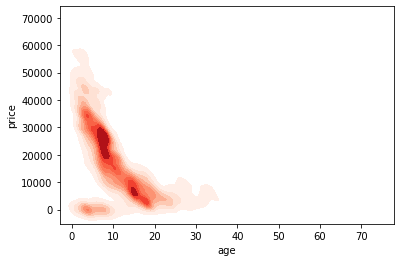

In [74]:
sns.kdeplot(x='age',y='price',data=df,cmap="Reds", shade=True, bw_adjust=.5)

/tmp/ipykernel_2985797/2079726061.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='age',y='price',data=df,cmap="Reds", shade=True, thresh=0)


<AxesSubplot: xlabel='age', ylabel='price'>

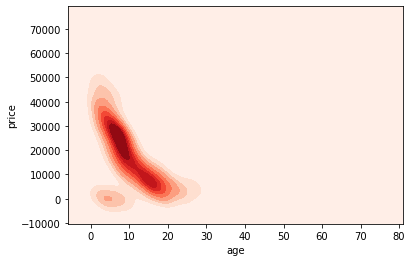

In [75]:
sns.kdeplot(x='age',y='price',data=df,cmap="Reds", shade=True, thresh=0)

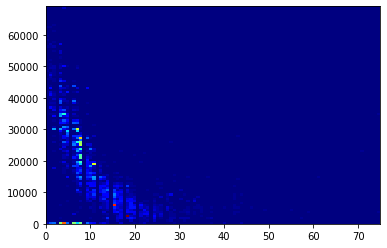

In [79]:
import matplotlib.pyplot as plt
plt.hist2d(x='age',y='price',data=df, bins=(100, 100), cmap=plt.cm.jet)
plt.show()

In [13]:
df = vehicle_1[vehicle_1["model"]=='silverado 1500']
df["year"] = df["year"].astype(int)
df["age"] = 2021 - df["year"]
df["price"] = df["price"].astype(float)
df = df[df["price"]!=0]
df.shape

/tmp/ipykernel_4072742/2625981520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = df["year"].astype(int)
/tmp/ipykernel_4072742/2625981520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"] = 2021 - df["year"]
/tmp/ipykernel_4072742/2625981520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

(2175, 27)

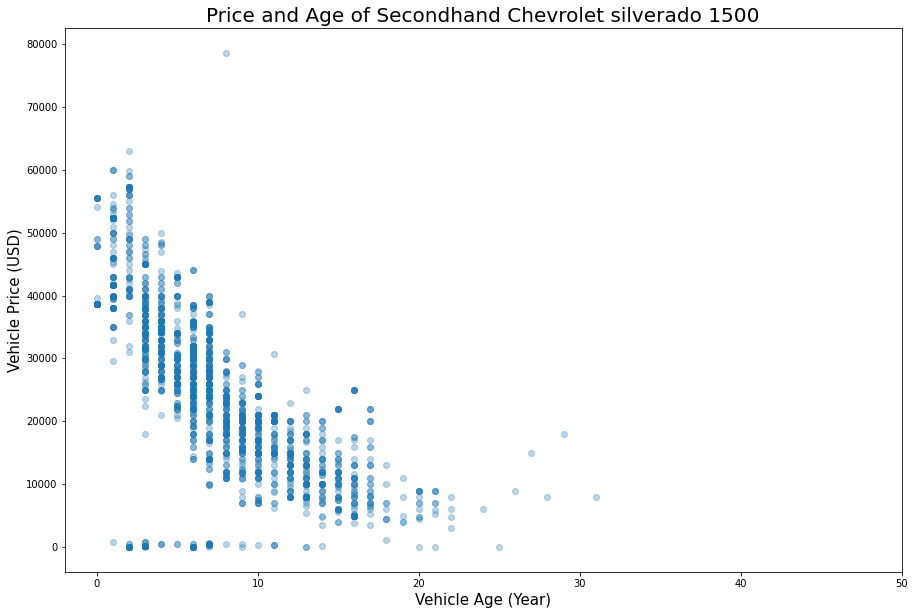

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(x="age", y="price",data=df,alpha=0.3)
plt.xlabel("Vehicle Age (Year)", fontsize=15)
plt.ylabel("Vehicle Price (USD)", fontsize=15)
plt.title("Price and Age of Secondhand Chevrolet silverado 1500", fontsize=20)
plt.xlim([-2,50])
plt.show()  

/home/yifeisun/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


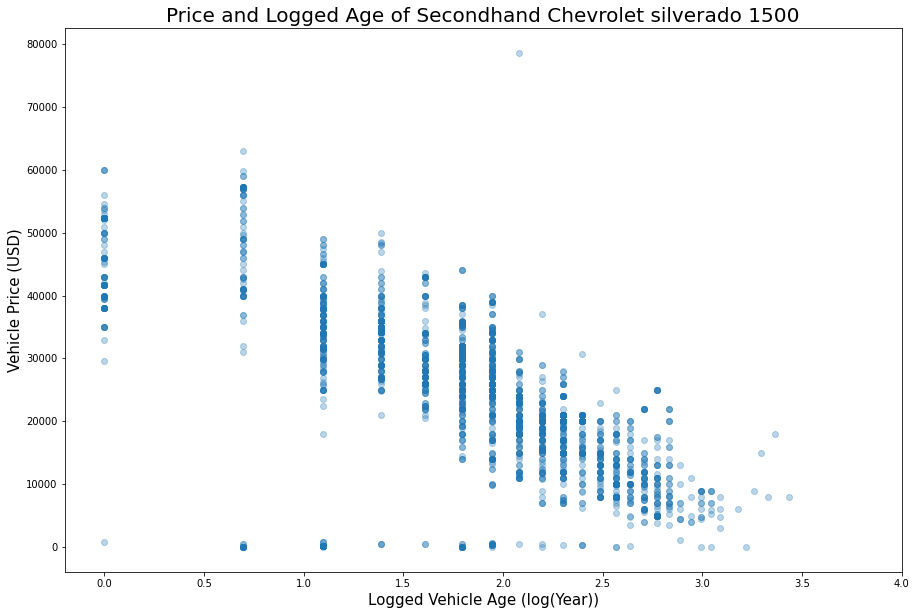

In [16]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,10))
plt.scatter(x=np.log(df["age"]), y="price",data=df,alpha=0.3)
plt.xlabel("Logged Vehicle Age (log(Year))", fontsize=15)
plt.ylabel("Vehicle Price (USD)", fontsize=15)
plt.title("Price and Logged Age of Secondhand Chevrolet silverado 1500", \
          fontsize=20)
plt.xlim([-0.2,4])
plt.show()

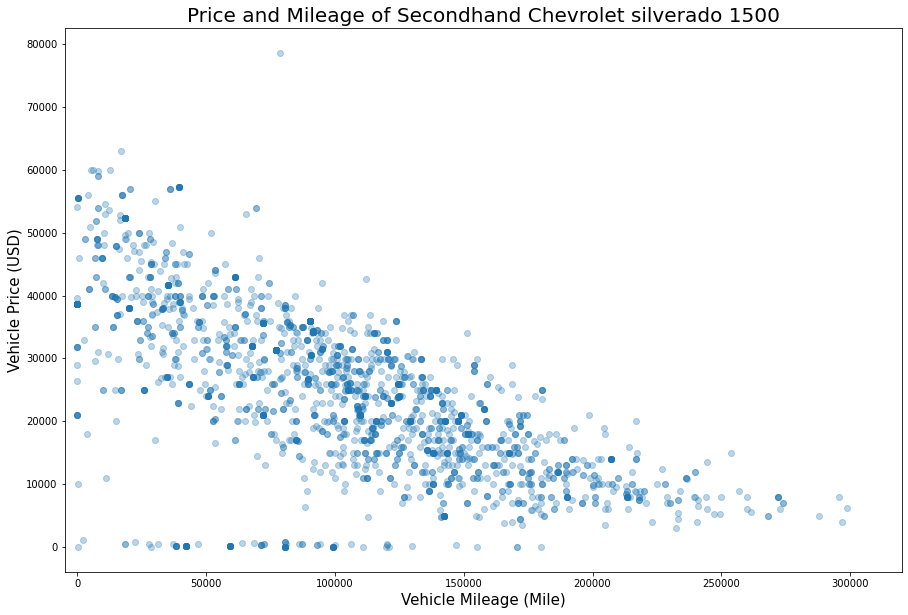

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(x="odometer", y="price",data=df,alpha=0.3)
plt.xlabel("Vehicle Mileage (Mile)", fontsize=15)
plt.ylabel("Vehicle Price (USD)", fontsize=15)
plt.title("Price and Mileage of Secondhand Chevrolet silverado 1500",\
          fontsize=20)
plt.xlim([-5000,320000])
plt.show()  

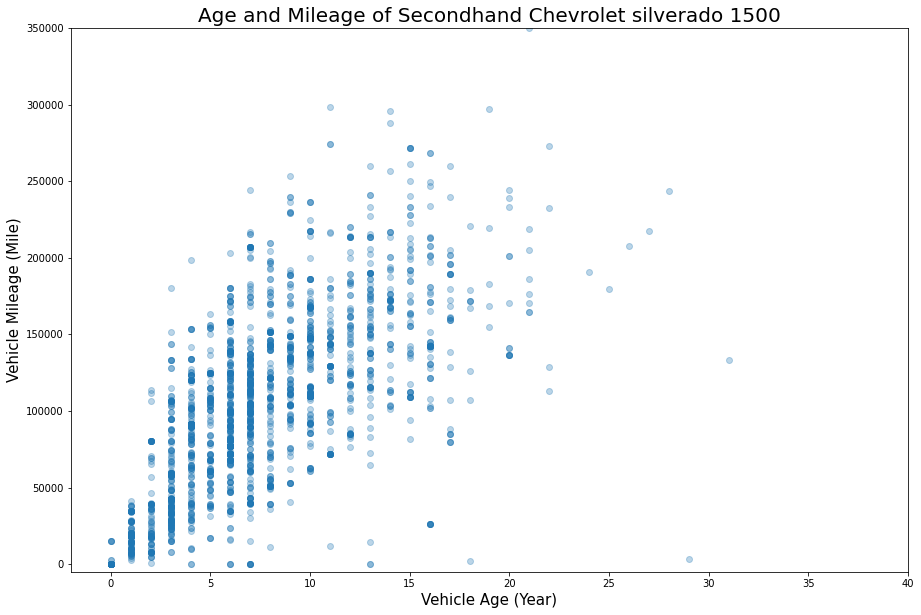

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(x="age", y="odometer",data=df,alpha=0.3)
plt.xlabel("Vehicle Age (Year)", fontsize=15)
plt.ylabel("Vehicle Mileage (Mile)", fontsize=15)
plt.title("Age and Mileage of Secondhand Chevrolet silverado 1500", fontsize=20)
plt.xlim([-2,40])
plt.ylim([-5000,350000])
plt.show()  

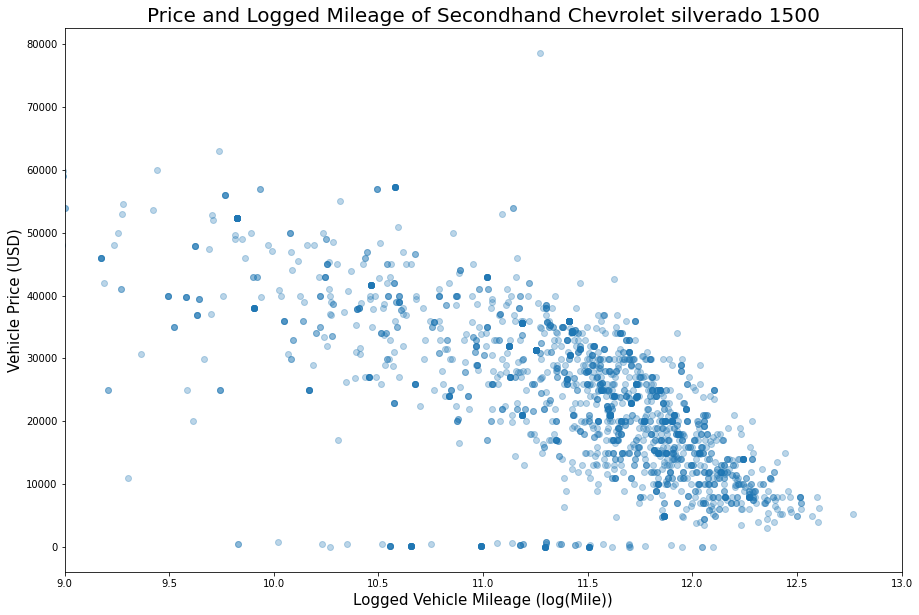

In [22]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,10))
plt.scatter(x=np.log(df["odometer"]), y="price",data=df,alpha=0.3)
plt.xlabel("Logged Vehicle Mileage (log(Mile))", fontsize=15)
plt.ylabel("Vehicle Price (USD)", fontsize=15)
plt.title("Price and Logged Mileage of Secondhand Chevrolet silverado 1500", fontsize=20)
plt.xlim([9,13])
plt.show()

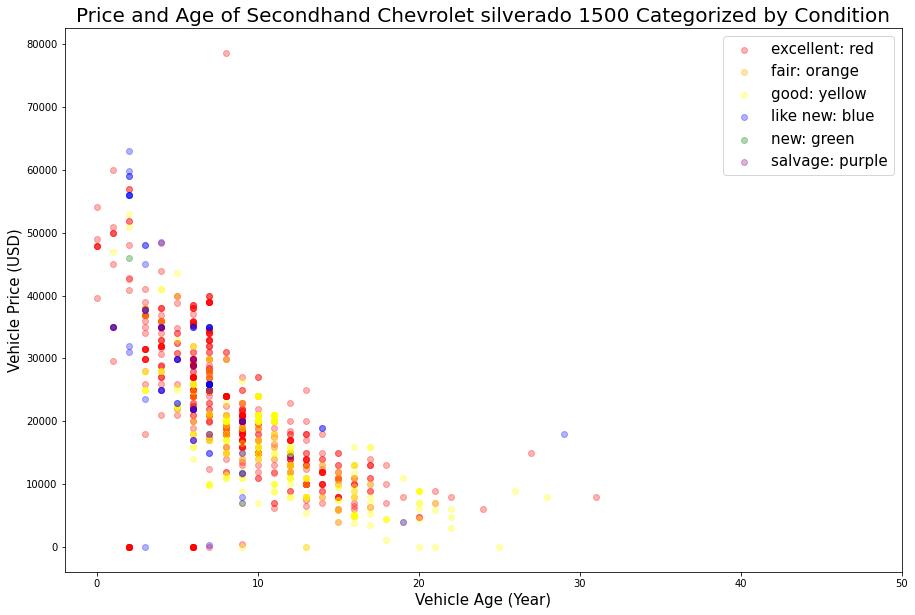

In [24]:
import matplotlib.pyplot as plt
colors = {'excellent':'red', 'fair':'orange', \
          'good':'yellow', 'like new':'blue', \
          'new':'green', 'salvage':'purple'}
plt.figure(figsize=(15,10))
plt.scatter(x="age", y="price",data=df[df["condition"]=="excellent"],\
            color=colors["excellent"],alpha=0.3)
plt.scatter(x="age", y="price",data=df[df["condition"]=="fair"],\
            color=colors["fair"],alpha=0.3)
plt.scatter(x="age", y="price",data=df[df["condition"]=="good"],\
            color=colors["good"],alpha=0.3)
plt.scatter(x="age", y="price",data=df[df["condition"]=="like new"],\
            color=colors["like new"],alpha=0.3)
plt.scatter(x="age", y="price",data=df[df["condition"]=="new"],\
            color=colors["new"],alpha=0.3)
plt.scatter(x="age", y="price",data=df[df["condition"]=="salvage"],\
            color=colors["salvage"],alpha=0.3)
plt.xlabel("Vehicle Age (Year)", fontsize=15)
plt.ylabel("Vehicle Price (USD)", fontsize=15)
plt.title("Price and Age of Secondhand Chevrolet silverado 1500 Categorized by Condition", fontsize=20)
plt.legend(['excellent: red', 'fair: orange', \
          'good: yellow', 'like new: blue', \
          'new: green', 'salvage: purple'], loc ="upper right", fontsize=15)
plt.xlim([-2,50])
plt.show()  

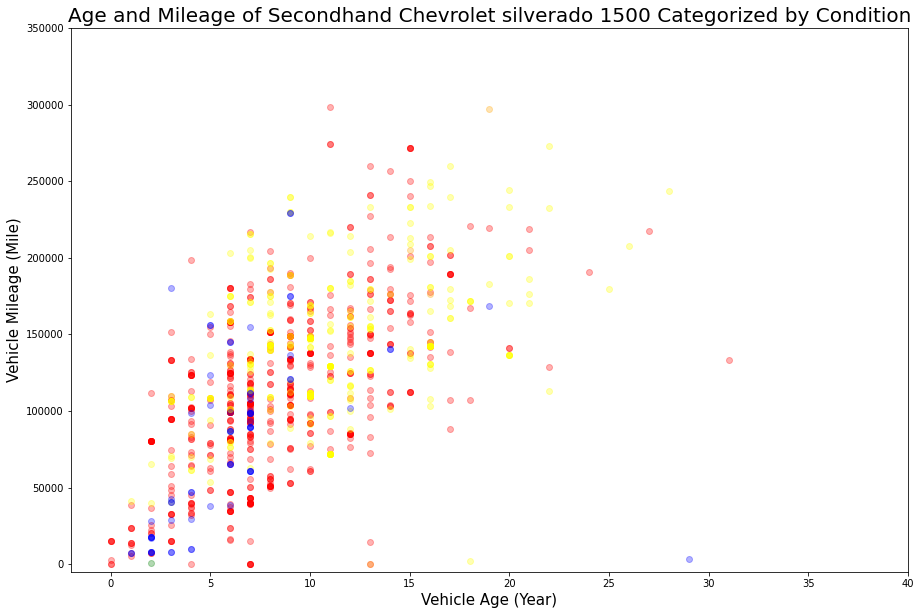

In [25]:
import matplotlib.pyplot as plt
colors = {'excellent':'red', 'fair':'orange', \
          'good':'yellow', 'like new':'blue', \
          'new':'green', 'salvage':'purple'}
plt.figure(figsize=(15,10))
plt.scatter(x="age", y="odometer",data=df[df["condition"]=="excellent"],\
            color=colors["excellent"],alpha=0.3)
plt.scatter(x="age", y="odometer",data=df[df["condition"]=="fair"],\
            color=colors["fair"],alpha=0.3)
plt.scatter(x="age", y="odometer",data=df[df["condition"]=="good"],\
            color=colors["good"],alpha=0.3)
plt.scatter(x="age", y="odometer",data=df[df["condition"]=="like new"],\
            color=colors["like new"],alpha=0.3)
plt.scatter(x="age", y="odometer",data=df[df["condition"]=="new"],\
            color=colors["new"],alpha=0.3)
plt.scatter(x="age", y="odometer",data=df[df["condition"]=="salvage"],\
            color=colors["salvage"],alpha=0.3)
plt.xlabel("Vehicle Age (Year)", fontsize=15)
plt.ylabel("Vehicle Mileage (Mile)", fontsize=15)
plt.title("Age and Mileage of Secondhand Chevrolet silverado 1500 Categorized by Condition", fontsize=20)
plt.xlim([-2,40])
plt.ylim([-5000,350000])
plt.show()   

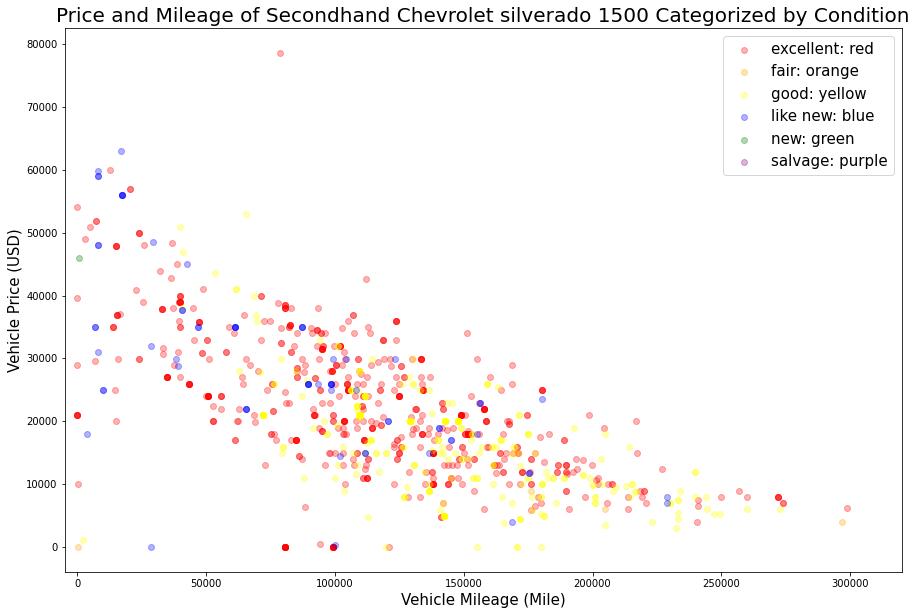

In [27]:
import matplotlib.pyplot as plt
colors = {'excellent':'red', 'fair':'orange', \
          'good':'yellow', 'like new':'blue', \
          'new':'green', 'salvage':'purple'}
plt.figure(figsize=(15,10))
plt.scatter(x="odometer", y="price",data=df[df["condition"]=="excellent"],\
            color=colors["excellent"],alpha=0.3)
plt.scatter(x="odometer", y="price",data=df[df["condition"]=="fair"],\
            color=colors["fair"],alpha=0.3)
plt.scatter(x="odometer", y="price",data=df[df["condition"]=="good"],\
            color=colors["good"],alpha=0.3)
plt.scatter(x="odometer", y="price",data=df[df["condition"]=="like new"],\
            color=colors["like new"],alpha=0.3)
plt.scatter(x="odometer", y="price",data=df[df["condition"]=="new"],\
            color=colors["new"],alpha=0.3)
plt.scatter(x="odometer", y="price",data=df[df["condition"]=="salvage"],\
            color=colors["salvage"],alpha=0.3)
plt.xlabel("Vehicle Mileage (Mile)", fontsize=15)
plt.ylabel("Vehicle Price (USD)", fontsize=15)
plt.title("Price and Mileage of Secondhand Chevrolet silverado 1500 Categorized by Condition", fontsize=20)
plt.legend(['excellent: red', 'fair: orange', \
          'good: yellow', 'like new: blue', \
          'new: green', 'salvage: purple'], loc ="upper right", fontsize=15)
plt.xlim([-5000,320000])
plt.show()  

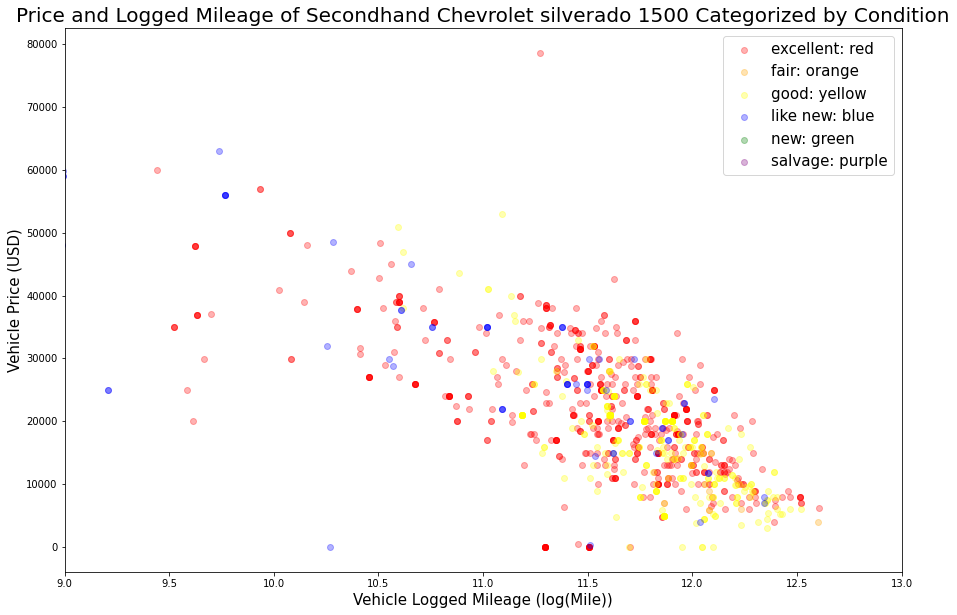

In [31]:
import matplotlib.pyplot as plt
import numpy as np
colors = {'excellent':'red', 'fair':'orange', \
          'good':'yellow', 'like new':'blue', \
          'new':'green', 'salvage':'purple'}
plt.figure(figsize=(15,10))
plt.scatter(x=np.log(df[df["condition"]=="excellent"]["odometer"]), y="price",\
            data=df[df["condition"]=="excellent"],\
            color=colors["excellent"],alpha=0.3)
plt.scatter(x=np.log(df[df["condition"]=="fair"]["odometer"]), y="price",\
            data=df[df["condition"]=="fair"],\
            color=colors["fair"],alpha=0.3)
plt.scatter(x=np.log(df[df["condition"]=="good"]["odometer"]), y="price",\
            data=df[df["condition"]=="good"],\
            color=colors["good"],alpha=0.3)
plt.scatter(x=np.log(df[df["condition"]=="like new"]["odometer"]), y="price",\
            data=df[df["condition"]=="like new"],\
            color=colors["like new"],alpha=0.3)
plt.scatter(x=np.log(df[df["condition"]=="new"]["odometer"]), y="price",\
            data=df[df["condition"]=="new"],\
            color=colors["new"],alpha=0.3)
plt.scatter(x=np.log(df[df["condition"]=="salvage"]["odometer"]), y="price",\
            data=df[df["condition"]=="salvage"],\
            color=colors["salvage"],alpha=0.3)
plt.xlabel("Vehicle Logged Mileage (log(Mile))", fontsize=15)
plt.ylabel("Vehicle Price (USD)", fontsize=15)
plt.title("Price and Logged Mileage of Secondhand Chevrolet silverado 1500 Categorized by Condition", fontsize=20)
plt.legend(['excellent: red', 'fair: orange', \
          'good: yellow', 'like new: blue', \
          'new: green', 'salvage: purple'], loc ="upper right", fontsize=15)
plt.xlim([9,13])
plt.show() 

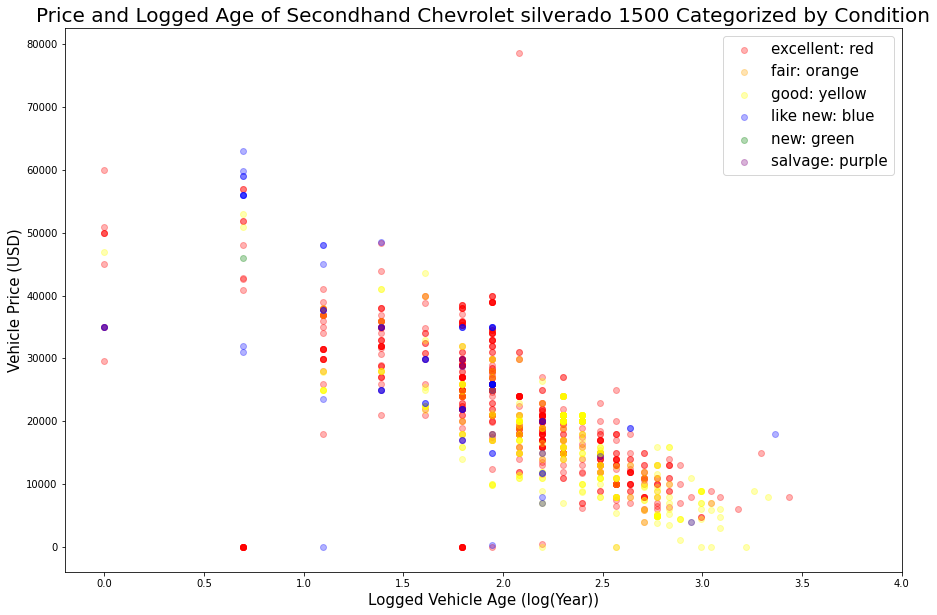

In [32]:
import matplotlib.pyplot as plt
import numpy as np
colors = {'excellent':'red', 'fair':'orange', \
          'good':'yellow', 'like new':'blue', \
          'new':'green', 'salvage':'purple'}
plt.figure(figsize=(15,10))
plt.scatter(x=np.log(df[df["condition"]=="excellent"]["age"]), y="price",\
            data=df[df["condition"]=="excellent"],\
            color=colors["excellent"],alpha=0.3)
plt.scatter(x=np.log(df[df["condition"]=="fair"]["age"]), y="price",\
            data=df[df["condition"]=="fair"],\
            color=colors["fair"],alpha=0.3)
plt.scatter(x=np.log(df[df["condition"]=="good"]["age"]), y="price",\
            data=df[df["condition"]=="good"],\
            color=colors["good"],alpha=0.3)
plt.scatter(x=np.log(df[df["condition"]=="like new"]["age"]), y="price",\
            data=df[df["condition"]=="like new"],\
            color=colors["like new"],alpha=0.3)
plt.scatter(x=np.log(df[df["condition"]=="new"]["age"]), y="price",\
            data=df[df["condition"]=="new"],\
            color=colors["new"],alpha=0.3)
plt.scatter(x=np.log(df[df["condition"]=="salvage"]["age"]), y="price",\
            data=df[df["condition"]=="salvage"],\
            color=colors["salvage"],alpha=0.3)
plt.xlabel("Logged Vehicle Age (log(Year))", fontsize=15)
plt.ylabel("Vehicle Price (USD)", fontsize=15)
plt.title("Price and Logged Age of Secondhand Chevrolet silverado 1500 Categorized by Condition", fontsize=20)
plt.legend(['excellent: red', 'fair: orange', \
          'good: yellow', 'like new: blue', \
          'new: green', 'salvage: purple'], loc ="upper right", fontsize=15)
plt.xlim([-0.2,4])
plt.show()  

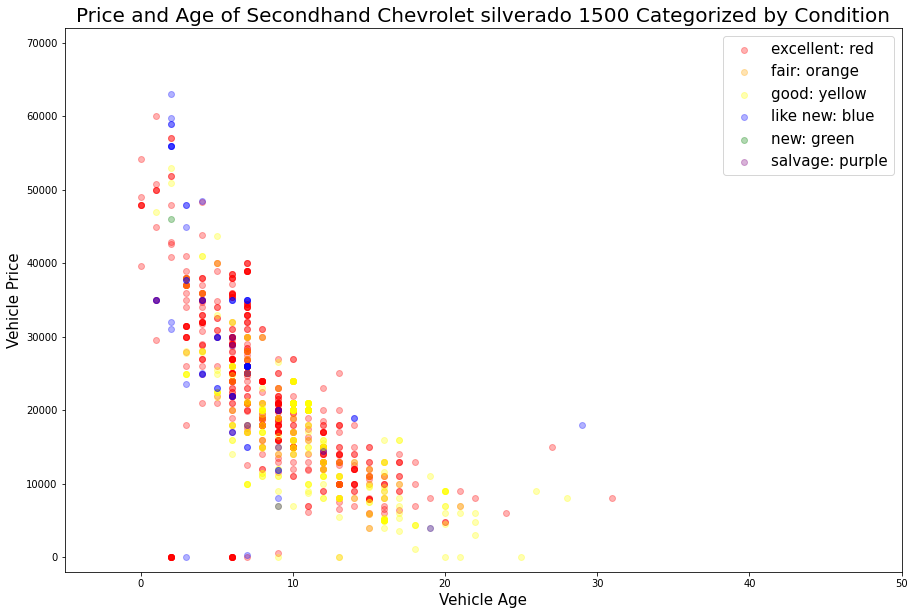

In [33]:
import matplotlib.pyplot as plt
colors = {'excellent':'red', 'fair':'orange', \
          'good':'yellow', 'like new':'blue', \
          'new':'green', 'salvage':'purple'}
plt.figure(figsize=(15,10))
plt.scatter(x="age", y="price",data=df[df["condition"]=="excellent"],\
            color=colors["excellent"],alpha=0.3)
plt.scatter(x="age", y="price",data=df[df["condition"]=="fair"],\
            color=colors["fair"],alpha=0.3)
plt.scatter(x="age", y="price",data=df[df["condition"]=="good"],\
            color=colors["good"],alpha=0.3)
plt.scatter(x="age", y="price",data=df[df["condition"]=="like new"],\
            color=colors["like new"],alpha=0.3)
plt.scatter(x="age", y="price",data=df[df["condition"]=="new"],\
            color=colors["new"],alpha=0.3)
plt.scatter(x="age", y="price",data=df[df["condition"]=="salvage"],\
            color=colors["salvage"],alpha=0.3)
plt.xlabel("Vehicle Age", fontsize=15)
plt.ylabel("Vehicle Price", fontsize=15)
plt.title("Price and Age of Secondhand Chevrolet silverado 1500 Categorized by Condition", fontsize=20)
plt.legend(['excellent: red', 'fair: orange', \
          'good: yellow', 'like new: blue', \
          'new: green', 'salvage: purple'], loc ="upper right", fontsize=15)
plt.xlim([-5,50])
plt.ylim([-2000,72000])
plt.show()  

In [35]:
from collections import Counter
Counter(list(df["condition"]))

Counter({nan: 1184,
         'good': 300,
         'excellent': 616,
         'like new': 70,
         'fair': 4,
         'new': 1})

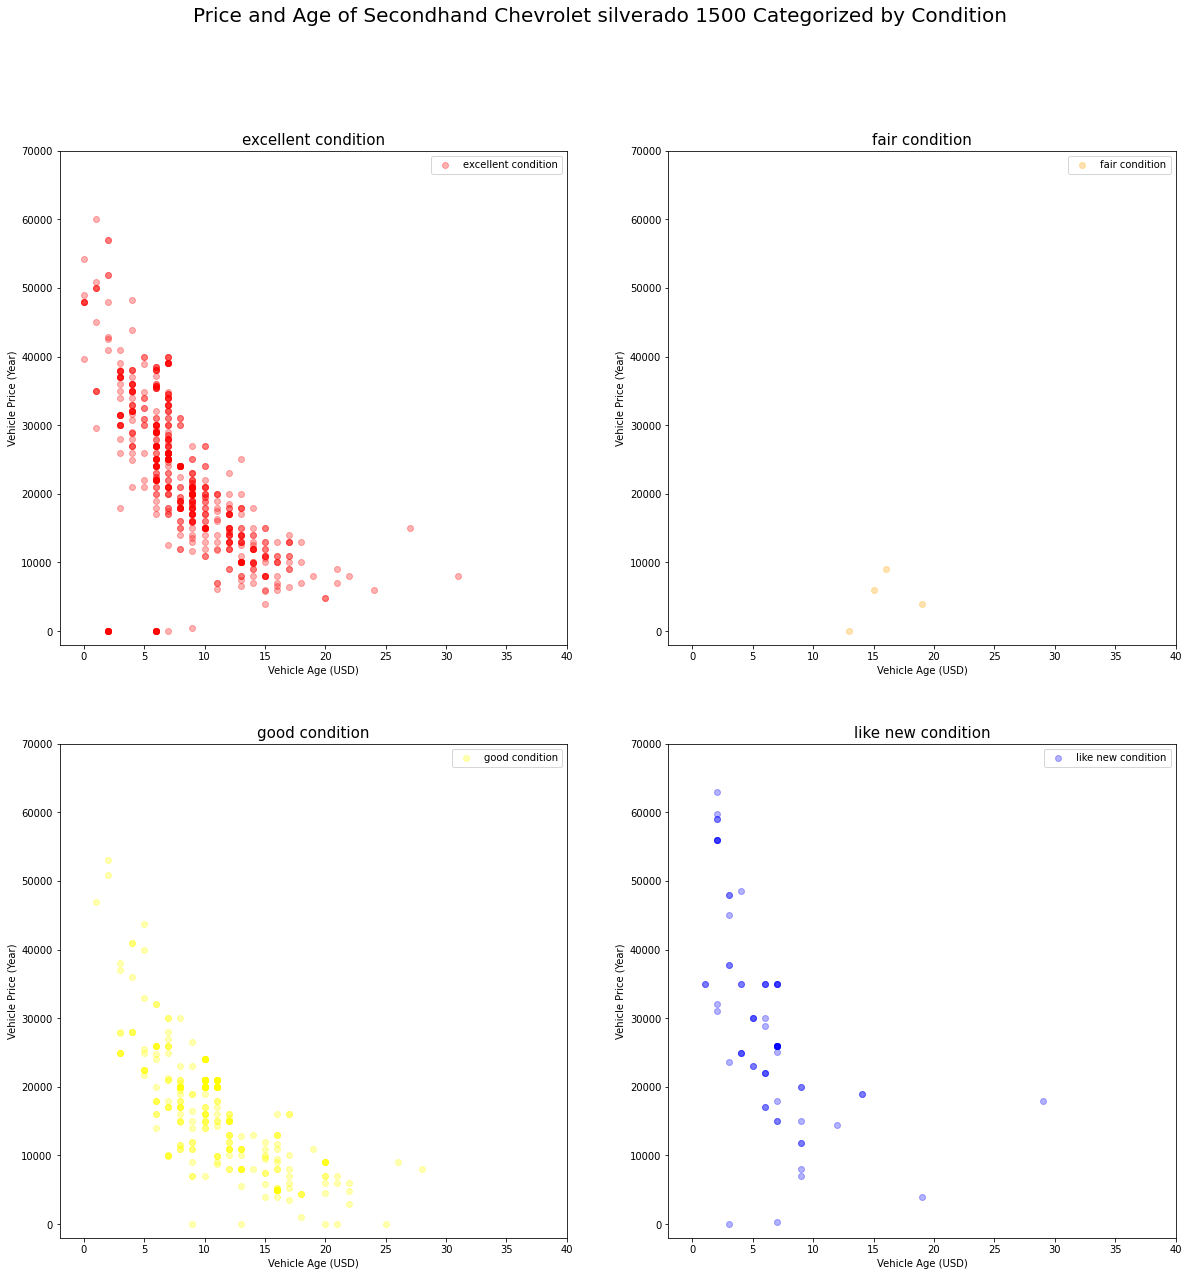

In [34]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
colors = {'excellent':'red', 'fair':'orange', \
          'good':'yellow', 'like new':'blue', \
          'new':'green', 'salvage':'purple'}
fig.suptitle("Price and Age of Secondhand Chevrolet silverado 1500 Categorized by Condition", fontsize=20)
axs[0, 0].scatter(x="age", y="price",data=df[df["condition"]=="excellent"],\
            color=colors["excellent"],alpha=0.3)
axs[0, 0].set_title('excellent condition', fontsize=15)
axs[0, 0].set_xlabel("Vehicle Age (USD)", fontsize=10)
axs[0, 0].set_ylabel("Vehicle Price (Year)", fontsize=10)
axs[0, 0].set_xlim([-2,40])
axs[0, 0].set_ylim([-2000,70000])
axs[0, 0].legend(["excellent condition"],loc="upper right", fontsize=10)
axs[0, 1].scatter(x="age", y="price",data=df[df["condition"]=="fair"],\
            color=colors["fair"],alpha=0.3)
axs[0, 1].set_title('fair condition', fontsize=15)
axs[0, 1].set_xlabel("Vehicle Age (USD)", fontsize=10)
axs[0, 1].set_ylabel("Vehicle Price (Year)", fontsize=10)
axs[0, 1].set_xlim([-2,40])
axs[0, 1].set_ylim([-2000,70000])
axs[0, 1].legend(["fair condition"],loc="upper right", fontsize=10)
axs[1, 0].scatter(x="age", y="price",data=df[df["condition"]=="good"],\
            color=colors["good"],alpha=0.3)
axs[1, 0].set_title('good condition', fontsize=15)
axs[1, 0].set_xlabel("Vehicle Age (USD)", fontsize=10)
axs[1, 0].set_ylabel("Vehicle Price (Year)", fontsize=10)
axs[1, 0].set_xlim([-2,40])
axs[1, 0].set_ylim([-2000,70000])
axs[1, 0].legend(["good condition"],loc="upper right", fontsize=10)
axs[1, 1].scatter(x="age", y="price",data=df[df["condition"]=="like new"],\
            color=colors["like new"],alpha=0.3)
axs[1, 1].set_title('like new condition', fontsize=15)
axs[1, 1].set_xlabel("Vehicle Age (USD)", fontsize=10)
axs[1, 1].set_ylabel("Vehicle Price (Year)", fontsize=10)
axs[1, 1].set_xlim([-2,40])
axs[1, 1].set_ylim([-2000,70000])
axs[1, 1].legend(["like new condition"],loc="upper right", fontsize=10)

In [ ]:
plt.xlim([-2,40])
plt.ylim([-5000,350000])

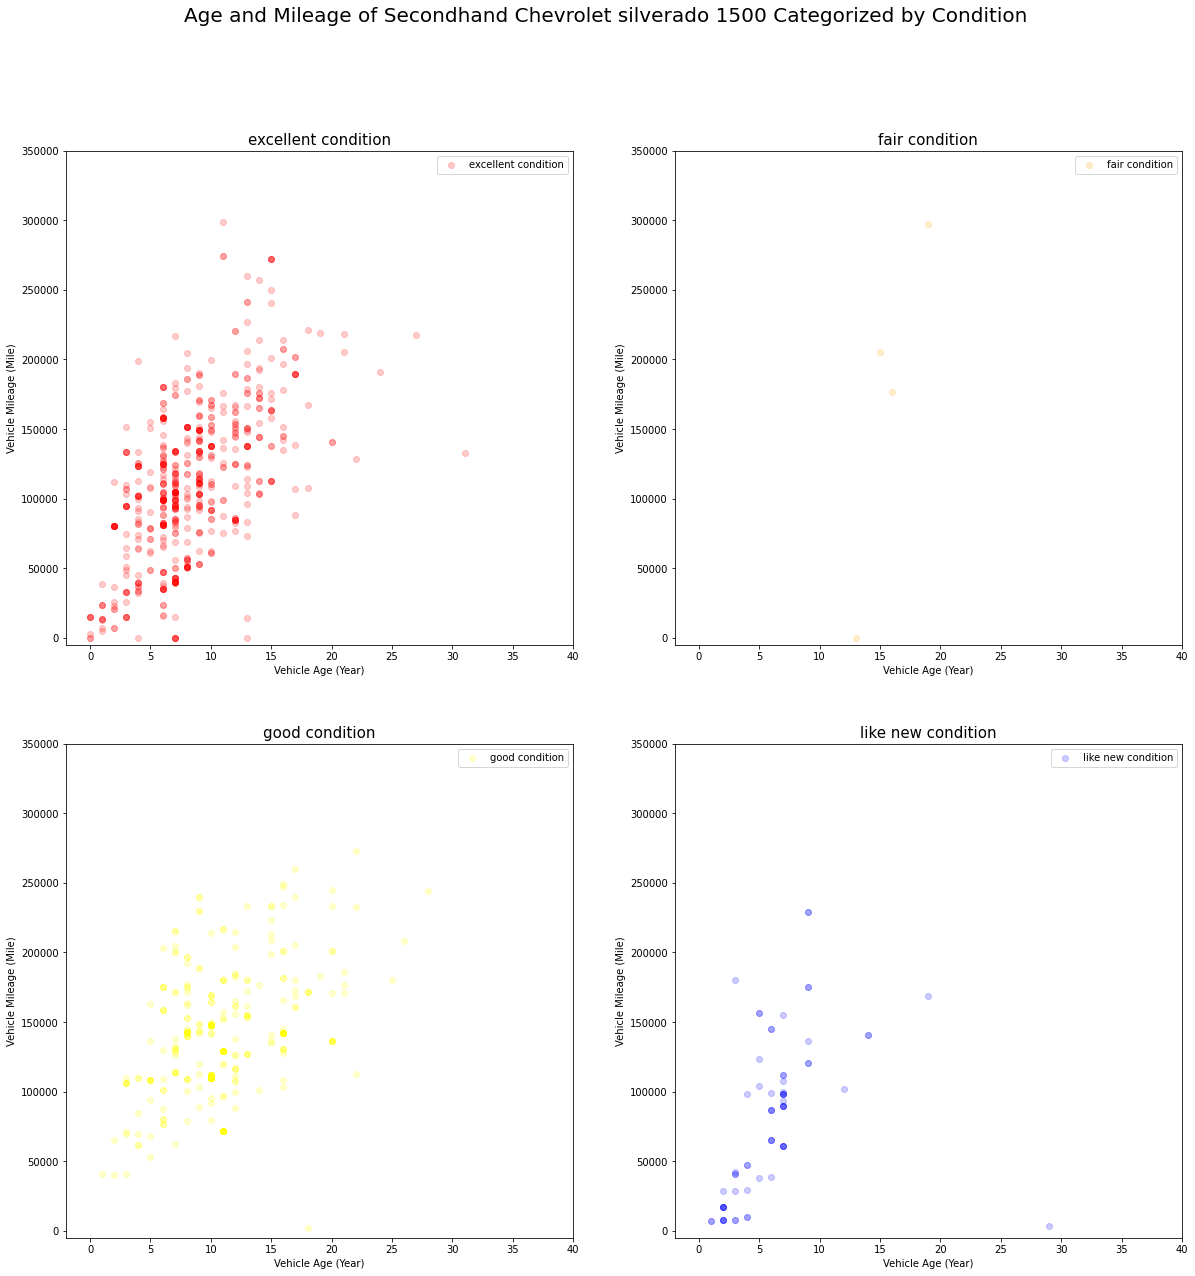

In [36]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
colors = {'excellent':'red', 'fair':'orange', \
          'good':'yellow', 'like new':'blue', \
          'new':'green', 'salvage':'purple'}
fig.suptitle("Age and Mileage of Secondhand Chevrolet silverado 1500 Categorized by Condition", fontsize=20)
axs[0, 0].scatter(x="age", y="odometer",data=df[df["condition"]=="excellent"],\
            color=colors["excellent"],alpha=0.2)
axs[0, 0].set_title('excellent condition', fontsize=15)
axs[0, 0].set_xlabel("Vehicle Age (Year)", fontsize=10)
axs[0, 0].set_ylabel("Vehicle Mileage (Mile)", fontsize=10)
axs[0, 0].set_xlim([-2,40])
axs[0, 0].set_ylim([-5000,350000])
axs[0, 0].legend(["excellent condition"],loc="upper right", fontsize=10)
axs[0, 1].scatter(x="age", y="odometer",data=df[df["condition"]=="fair"],\
            color=colors["fair"],alpha=0.2)
axs[0, 1].set_title('fair condition', fontsize=15)
axs[0, 1].set_xlabel("Vehicle Age (Year)", fontsize=10)
axs[0, 1].set_ylabel("Vehicle Mileage (Mile)", fontsize=10)
axs[0, 1].set_xlim([-2,40])
axs[0, 1].set_ylim([-5000,350000])
axs[0, 1].legend(["fair condition"],loc="upper right", fontsize=10)
axs[1, 0].scatter(x="age", y="odometer",data=df[df["condition"]=="good"],\
            color=colors["good"],alpha=0.2)
axs[1, 0].set_title('good condition', fontsize=15)
axs[1, 0].set_xlabel("Vehicle Age (Year)", fontsize=10)
axs[1, 0].set_ylabel("Vehicle Mileage (Mile)", fontsize=10)
axs[1, 0].set_xlim([-2,40])
axs[1, 0].set_ylim([-5000,350000])
axs[1, 0].legend(["good condition"],loc="upper right", fontsize=10)
axs[1, 1].scatter(x="age", y="odometer",data=df[df["condition"]=="like new"],\
            color=colors["like new"],alpha=0.2)
axs[1, 1].set_title('like new condition', fontsize=15)
axs[1, 1].set_xlabel("Vehicle Age (Year)", fontsize=10)
axs[1, 1].set_ylabel("Vehicle Mileage (Mile)", fontsize=10)
axs[1, 1].set_xlim([-2,40])
axs[1, 1].set_ylim([-5000,350000])
axs[1, 1].legend(["like new condition"],loc="upper right", fontsize=10)

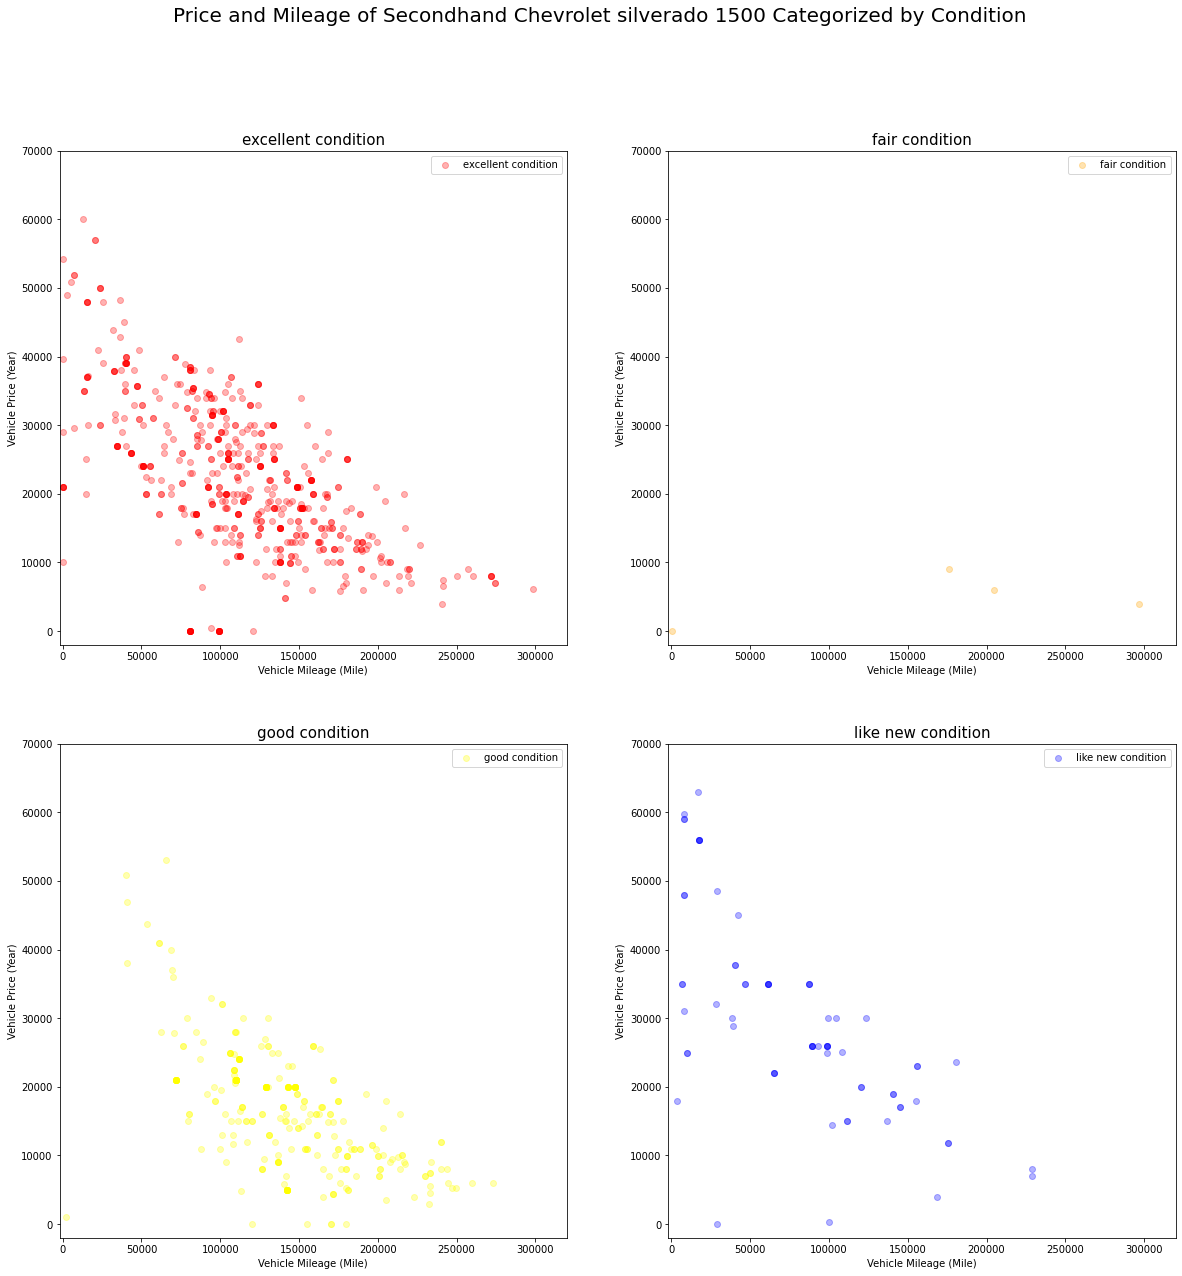

In [37]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
colors = {'excellent':'red', 'fair':'orange', \
          'good':'yellow', 'like new':'blue', \
          'new':'green', 'salvage':'purple'}
fig.suptitle("Price and Mileage of Secondhand Chevrolet silverado 1500 Categorized by Condition", fontsize=20)
axs[0, 0].scatter(x="odometer", y="price",data=df[df["condition"]=="excellent"],\
            color=colors["excellent"],alpha=0.3)
axs[0, 0].set_title('excellent condition', fontsize=15)
axs[0, 0].set_xlabel("Vehicle Mileage (Mile)", fontsize=10)
axs[0, 0].set_ylabel("Vehicle Price (Year)", fontsize=10)
axs[0, 0].set_xlim([-2000,320000])
axs[0, 0].set_ylim([-2000,70000])
axs[0, 0].legend(["excellent condition"],loc="upper right", fontsize=10)
axs[0, 1].scatter(x="odometer", y="price",data=df[df["condition"]=="fair"],\
            color=colors["fair"],alpha=0.3)
axs[0, 1].set_title('fair condition', fontsize=15)
axs[0, 1].set_xlabel("Vehicle Mileage (Mile)", fontsize=10)
axs[0, 1].set_ylabel("Vehicle Price (Year)", fontsize=10)
axs[0, 1].set_xlim([-2000,320000])
axs[0, 1].set_ylim([-2000,70000])
axs[0, 1].legend(["fair condition"],loc="upper right", fontsize=10)
axs[1, 0].scatter(x="odometer", y="price",data=df[df["condition"]=="good"],\
            color=colors["good"],alpha=0.3)
axs[1, 0].set_title('good condition', fontsize=15)
axs[1, 0].set_xlabel("Vehicle Mileage (Mile)", fontsize=10)
axs[1, 0].set_ylabel("Vehicle Price (Year)", fontsize=10)
axs[1, 0].set_xlim([-2000,320000])
axs[1, 0].set_ylim([-2000,70000])
axs[1, 0].legend(["good condition"],loc="upper right", fontsize=10)
axs[1, 1].scatter(x="odometer", y="price",data=df[df["condition"]=="like new"],\
            color=colors["like new"],alpha=0.3)
axs[1, 1].set_title('like new condition', fontsize=15)
axs[1, 1].set_xlabel("Vehicle Mileage (Mile)", fontsize=10)
axs[1, 1].set_ylabel("Vehicle Price (Year)", fontsize=10)
axs[1, 1].set_xlim([-2000,320000])
axs[1, 1].set_ylim([-2000,70000])
axs[1, 1].legend(["like new condition"],loc="upper right", fontsize=10)

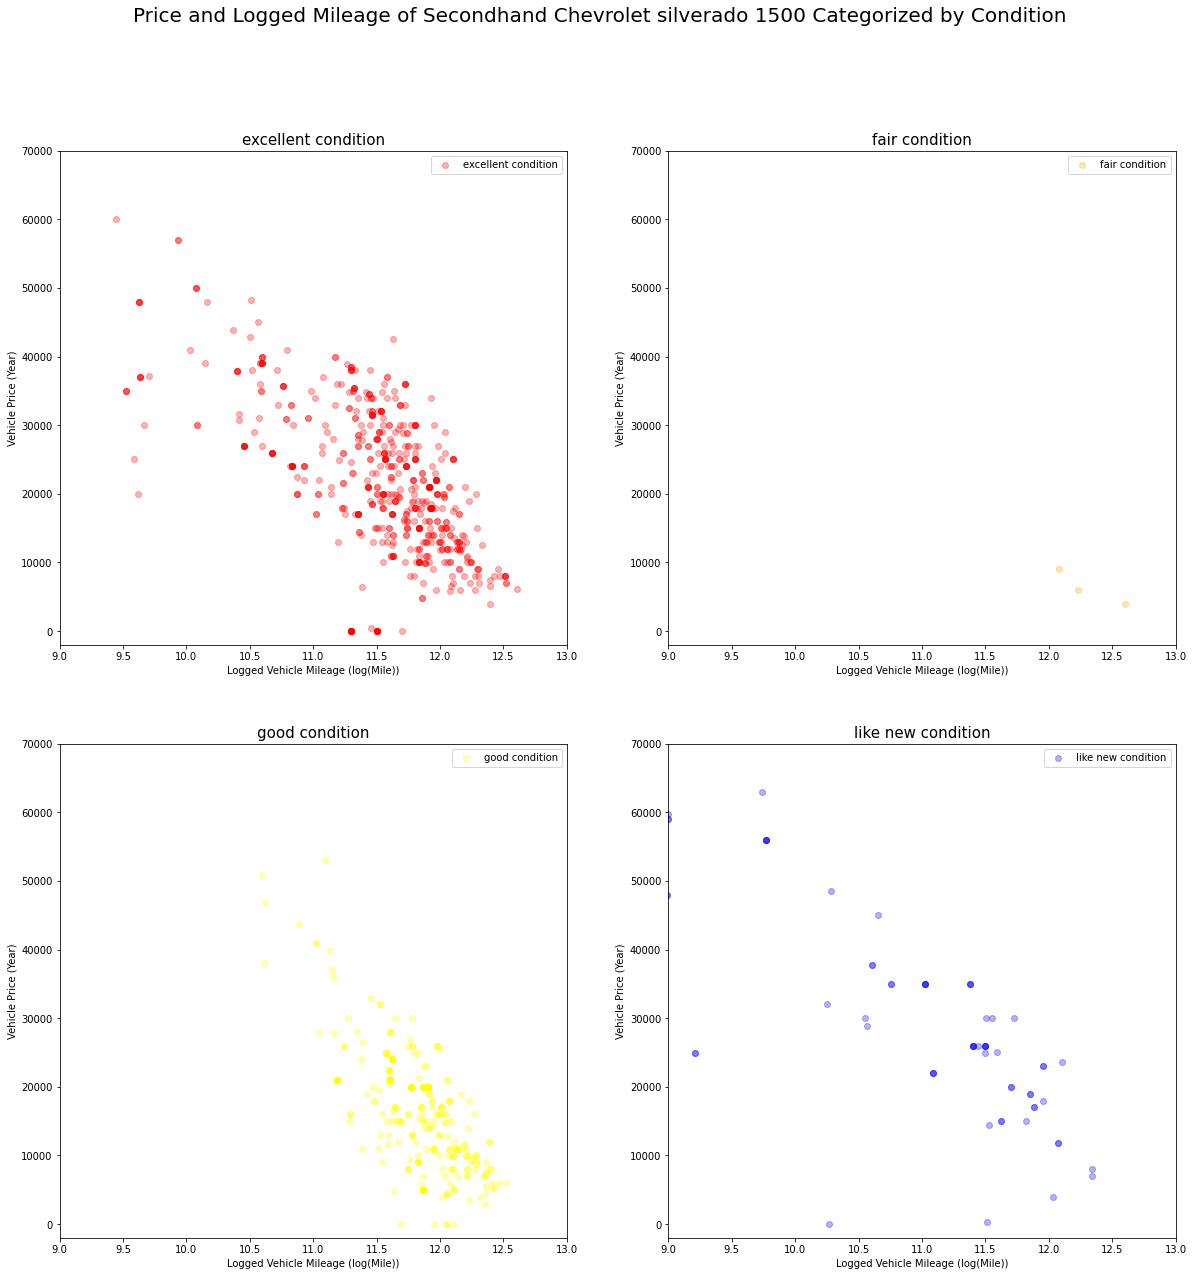

In [40]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
colors = {'excellent':'red', 'fair':'orange', \
          'good':'yellow', 'like new':'blue', \
          'new':'green', 'salvage':'purple'}
fig.suptitle("Price and Logged Mileage of Secondhand Chevrolet silverado 1500 Categorized by Condition", fontsize=20)
axs[0, 0].scatter(x=np.log(df[df["condition"]=="excellent"]["odometer"]), y="price",\
                  data=df[df["condition"]=="excellent"],\
            color=colors["excellent"],alpha=0.3)
axs[0, 0].set_title('excellent condition', fontsize=15)
axs[0, 0].set_xlabel("Logged Vehicle Mileage (log(Mile))", fontsize=10)
axs[0, 0].set_ylabel("Vehicle Price (Year)", fontsize=10)
axs[0, 0].set_xlim([9,13])
axs[0, 0].set_ylim([-2000,70000])
axs[0, 0].legend(["excellent condition"],loc="upper right", fontsize=10)
axs[0, 1].scatter(x=np.log(df[df["condition"]=="fair"]["odometer"]), y="price",\
                  data=df[df["condition"]=="fair"],\
            color=colors["fair"],alpha=0.3)
axs[0, 1].set_title('fair condition', fontsize=15)
axs[0, 1].set_xlabel("Logged Vehicle Mileage (log(Mile))", fontsize=10)
axs[0, 1].set_ylabel("Vehicle Price (Year)", fontsize=10)
axs[0, 1].set_xlim([9,13])
axs[0, 1].set_ylim([-2000,70000])
axs[0, 1].legend(["fair condition"],loc="upper right", fontsize=10)
axs[1, 0].scatter(x=np.log(df[df["condition"]=="good"]["odometer"]), y="price",\
                  data=df[df["condition"]=="good"],\
            color=colors["good"],alpha=0.3)
axs[1, 0].set_title('good condition', fontsize=15)
axs[1, 0].set_xlabel("Logged Vehicle Mileage (log(Mile))", fontsize=10)
axs[1, 0].set_ylabel("Vehicle Price (Year)", fontsize=10)
axs[1, 0].set_xlim([9,13])
axs[1, 0].set_ylim([-2000,70000])
axs[1, 0].legend(["good condition"],loc="upper right", fontsize=10)
axs[1, 1].scatter(x=np.log(df[df["condition"]=="like new"]["odometer"]), y="price",\
                  data=df[df["condition"]=="like new"],\
            color=colors["like new"],alpha=0.3)
axs[1, 1].set_title('like new condition', fontsize=15)
axs[1, 1].set_xlabel("Logged Vehicle Mileage (log(Mile))", fontsize=10)
axs[1, 1].set_ylabel("Vehicle Price (Year)", fontsize=10)
axs[1, 1].set_xlim([9,13])
axs[1, 1].set_ylim([-2000,70000])
axs[1, 1].legend(["like new condition"],loc="upper right", fontsize=10)

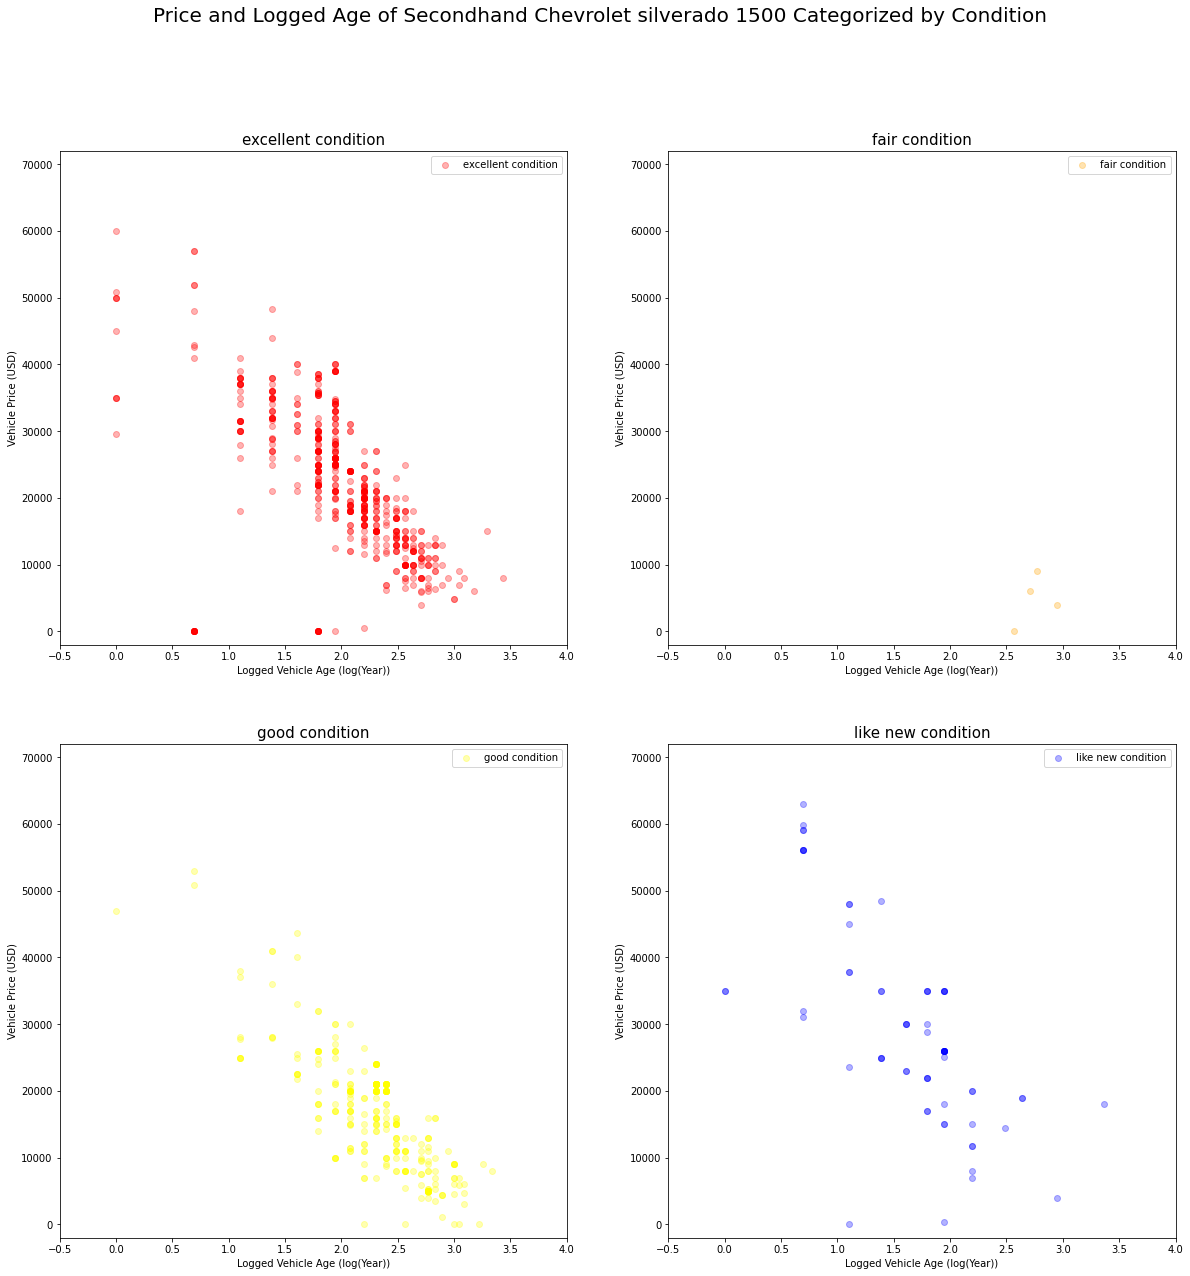

In [41]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
colors = {'excellent':'red', 'fair':'orange', \
          'good':'yellow', 'like new':'blue', \
          'new':'green', 'salvage':'purple'}
fig.suptitle("Price and Logged Age of Secondhand Chevrolet silverado 1500 Categorized by Condition", fontsize=20)
axs[0, 0].scatter(x=np.log(df[df["condition"]=="excellent"]["age"]), y="price",\
                  data=df[df["condition"]=="excellent"],\
            color=colors["excellent"],alpha=0.3)
axs[0, 0].set_title('excellent condition', fontsize=15)
axs[0, 0].set_xlabel("Logged Vehicle Age (log(Year))", fontsize=10)
axs[0, 0].set_ylabel("Vehicle Price (USD)", fontsize=10)
axs[0, 0].set_xlim([-0.5,4])
axs[0, 0].set_ylim([-2000,72000])
axs[0, 0].legend(["excellent condition"],loc="upper right", fontsize=10)
axs[0, 1].scatter(x=np.log(df[df["condition"]=="fair"]["age"]), y="price",\
                  data=df[df["condition"]=="fair"],\
            color=colors["fair"],alpha=0.3)
axs[0, 1].set_title('fair condition', fontsize=15)
axs[0, 1].set_xlabel("Logged Vehicle Age (log(Year))", fontsize=10)
axs[0, 1].set_ylabel("Vehicle Price (USD)", fontsize=10)
axs[0, 1].set_xlim([-0.5,4])
axs[0, 1].set_ylim([-2000,72000])
axs[0, 1].legend(["fair condition"],loc="upper right", fontsize=10)
axs[1, 0].scatter(x=np.log(df[df["condition"]=="good"]["age"]), y="price",\
                  data=df[df["condition"]=="good"],\
            color=colors["good"],alpha=0.3)
axs[1, 0].set_title('good condition', fontsize=15)
axs[1, 0].set_xlabel("Logged Vehicle Age (log(Year))", fontsize=10)
axs[1, 0].set_ylabel("Vehicle Price (USD)", fontsize=10)
axs[1, 0].set_xlim([-0.5,4])
axs[1, 0].set_ylim([-2000,72000])
axs[1, 0].legend(["good condition"],loc="upper right", fontsize=10)
axs[1, 1].scatter(x=np.log(df[df["condition"]=="like new"]["age"]), y="price",\
                  data=df[df["condition"]=="like new"],\
            color=colors["like new"],alpha=0.3)
axs[1, 1].set_title('like new condition', fontsize=15)
axs[1, 1].set_xlabel("Logged Vehicle Age (log(Year))", fontsize=10)
axs[1, 1].set_ylabel("Vehicle Price (USD)", fontsize=10)
axs[1, 1].set_xlim([-0.5,4])
axs[1, 1].set_ylim([-2000,72000])
axs[1, 1].legend(["like new condition"],loc="upper right", fontsize=10)

In [79]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date', 'posting_date_time', 'age'],
      dtype='object')

In [42]:
Counter(list(df["title_status"]))

Counter({'clean': 2149, nan: 11, 'rebuilt': 12, 'salvage': 3})

In [43]:
Counter(list(df["type"]))

Counter({nan: 452,
         'truck': 892,
         'pickup': 794,
         'other': 34,
         'sedan': 1,
         'offroad': 1,
         'SUV': 1})

In [48]:
Counter(list(df["cylinders"]))

Counter({nan: 826,
         '8 cylinders': 1088,
         '4 cylinders': 69,
         '6 cylinders': 182,
         '10 cylinders': 10})

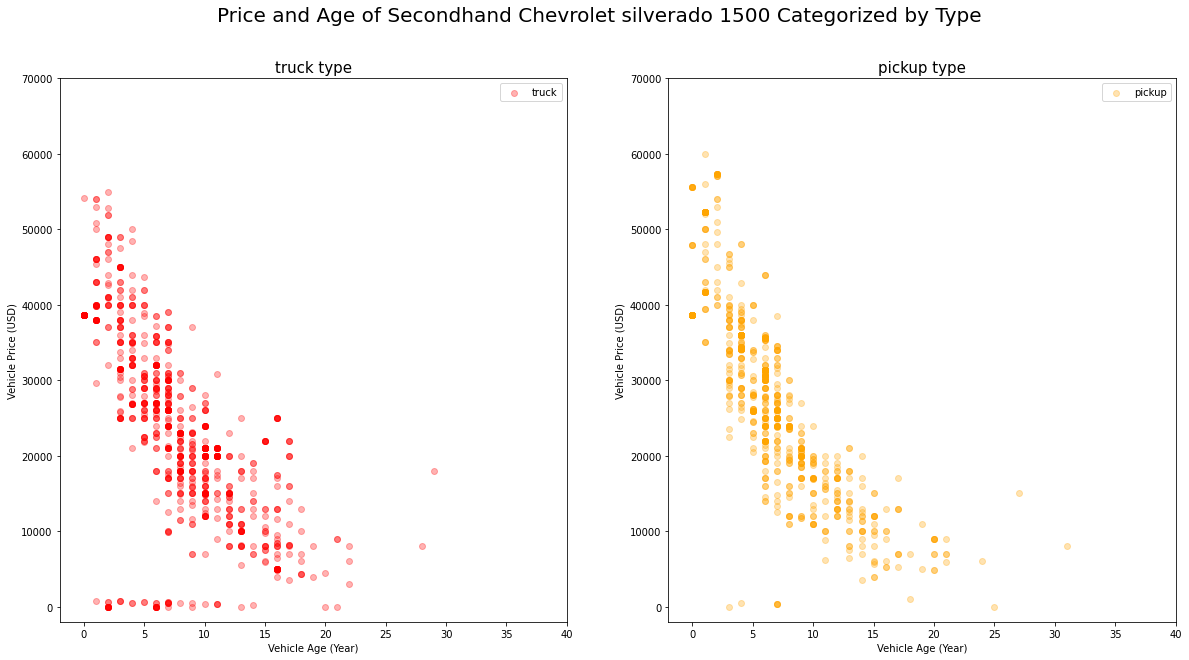

In [45]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
colors = {'truck':'red', 'pickup':'orange'}
fig.suptitle("Price and Age of Secondhand Chevrolet silverado 1500 Categorized by Type", fontsize=20)
axs[0].scatter(x="age", y="price",data=df[df["type"]=="truck"],\
            color=colors["truck"],alpha=0.3)
axs[0].set_title('truck type', fontsize=15)
axs[0].set_xlabel("Vehicle Age (Year)", fontsize=10)
axs[0].set_ylabel("Vehicle Price (USD)", fontsize=10)
axs[0].set_xlim([-2,40])
axs[0].set_ylim([-2000,70000])
axs[0].legend(["truck"],loc="upper right", fontsize=10)
axs[1].scatter(x="age", y="price",data=df[df["type"]=="pickup"],\
            color=colors["pickup"],alpha=0.3)
axs[1].set_title('pickup type', fontsize=15)
axs[1].set_xlabel("Vehicle Age (Year)", fontsize=10)
axs[1].set_ylabel("Vehicle Price (USD)", fontsize=10)
axs[1].set_xlim([-2,40])
axs[1].set_ylim([-2000,70000])
axs[1].legend(["pickup"],loc="upper right", fontsize=10)

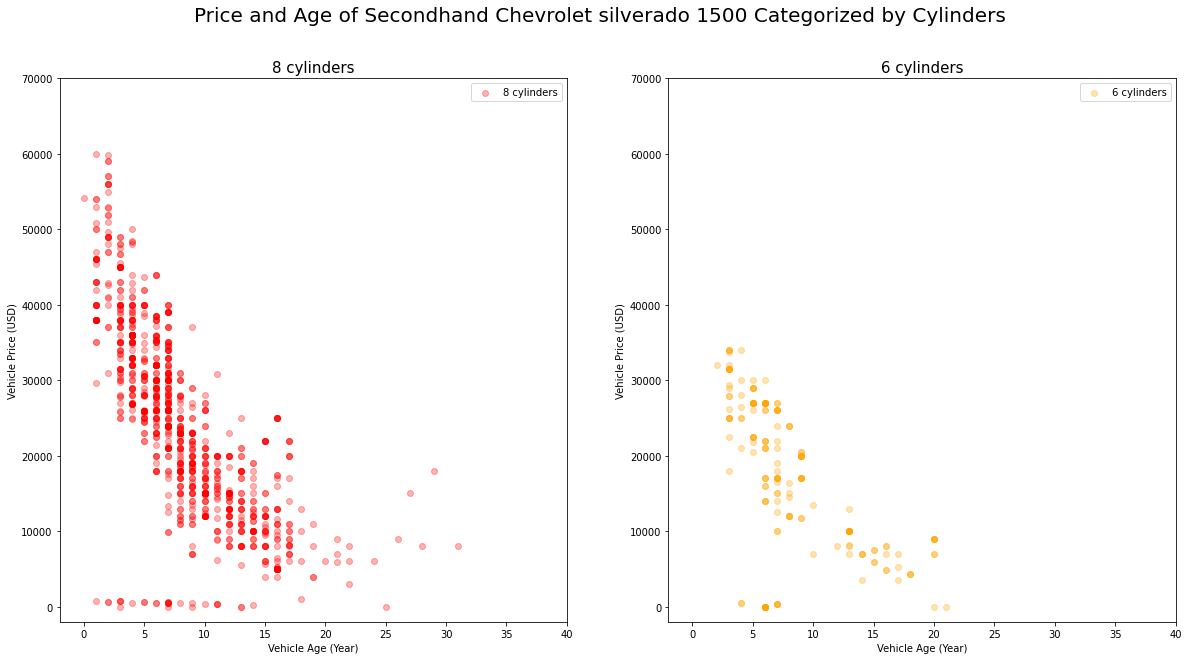

In [49]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
colors = {'8 cylinders':'red', '6 cylinders':'orange'}
fig.suptitle("Price and Age of Secondhand Chevrolet silverado 1500 Categorized by Cylinders", fontsize=20)
axs[0].scatter(x="age", y="price",data=df[df["cylinders"]=="8 cylinders"],\
            color=colors["8 cylinders"],alpha=0.3)
axs[0].set_title('8 cylinders', fontsize=15)
axs[0].set_xlabel("Vehicle Age (Year)", fontsize=10)
axs[0].set_ylabel("Vehicle Price (USD)", fontsize=10)
axs[0].set_xlim([-2,40])
axs[0].set_ylim([-2000,70000])
axs[0].legend(["8 cylinders"],loc="upper right", fontsize=10)
axs[1].scatter(x="age", y="price",data=df[df["cylinders"]=="6 cylinders"],\
            color=colors["6 cylinders"],alpha=0.3)
axs[1].set_title('6 cylinders', fontsize=15)
axs[1].set_xlabel("Vehicle Age (Year)", fontsize=10)
axs[1].set_ylabel("Vehicle Price (USD)", fontsize=10)
axs[1].set_xlim([-2,40])
axs[1].set_ylim([-2000,70000])
axs[1].legend(["6 cylinders"],loc="upper right", fontsize=10)

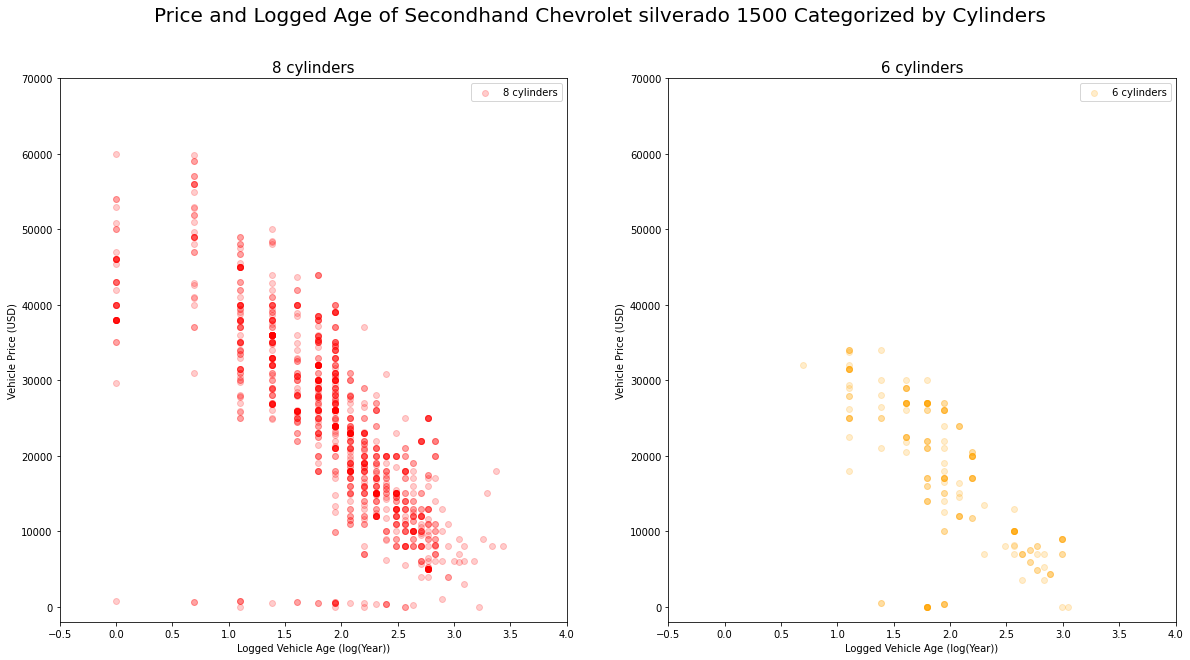

In [50]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
colors = {'truck':'red', 'pickup':'orange'}
fig.suptitle("Price and Logged Age of Secondhand Chevrolet silverado 1500 Categorized by Cylinders", fontsize=20)
axs[0].scatter(x=np.log(df[df["cylinders"]=="8 cylinders"]["age"]), y="price",data=df[df["cylinders"]=="8 cylinders"],\
            color=colors["truck"],alpha=0.2)
axs[0].set_title('8 cylinders', fontsize=15)
axs[0].set_xlabel("Logged Vehicle Age (log(Year))", fontsize=10)
axs[0].set_ylabel("Vehicle Price (USD)", fontsize=10)
axs[0].set_xlim([-0.5,4])
axs[0].set_ylim([-2000,70000])
axs[0].legend(["8 cylinders"],loc="upper right", fontsize=10)
axs[1].scatter(x=np.log(df[df["cylinders"]=="6 cylinders"]["age"]), y="price",data=df[df["cylinders"]=="6 cylinders"],\
            color=colors["pickup"],alpha=0.2)
axs[1].set_title('6 cylinders', fontsize=15)
axs[1].set_xlabel("Logged Vehicle Age (log(Year))", fontsize=10)
axs[1].set_ylabel("Vehicle Price (USD)", fontsize=10)
axs[1].set_xlim([-0.5,4])
axs[1].set_ylim([-2000,70000])
axs[1].legend(["6 cylinders"],loc="upper right", fontsize=10)

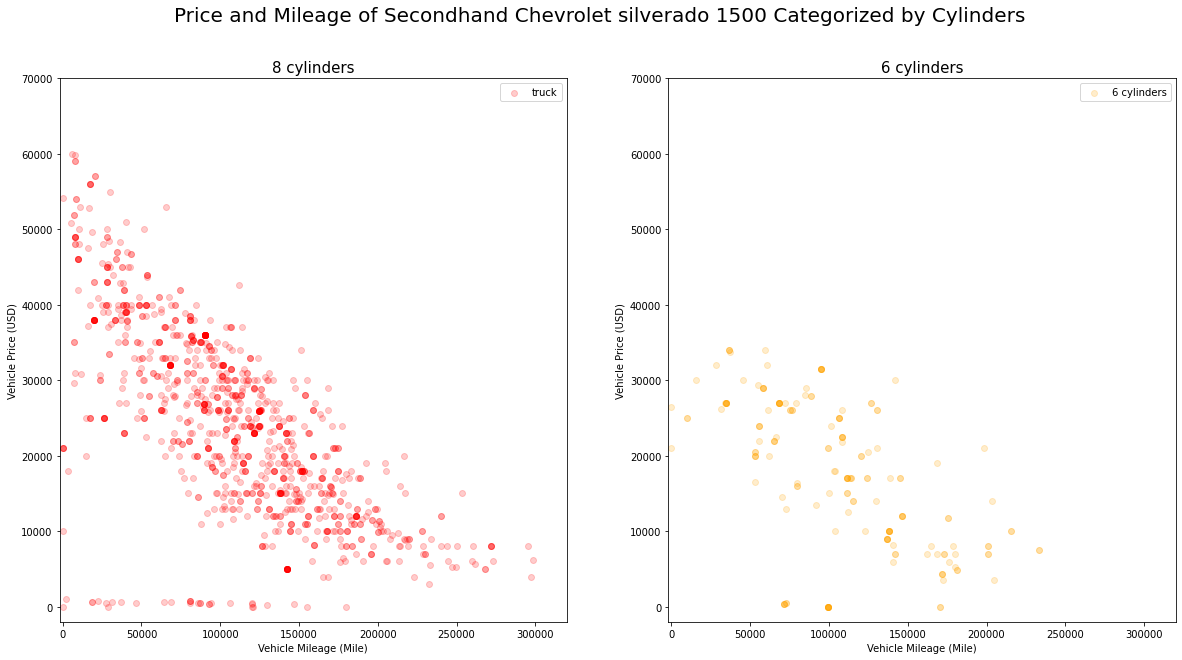

In [51]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
colors = {'8 cylinders':'red', '6 cylinders':'orange'}
fig.suptitle("Price and Mileage of Secondhand Chevrolet silverado 1500 Categorized by Cylinders", fontsize=20)
axs[0].scatter(x="odometer", y="price",data=df[df["cylinders"]=="8 cylinders"],\
            color=colors["8 cylinders"],alpha=0.2)
axs[0].set_title('8 cylinders', fontsize=15)
axs[0].set_xlabel("Vehicle Mileage (Mile)", fontsize=10)
axs[0].set_ylabel("Vehicle Price (USD)", fontsize=10)
axs[0].set_xlim([-2000,320000])
axs[0].set_ylim([-2000,70000])
axs[0].legend(["truck"],loc="upper right", fontsize=10)
axs[1].scatter(x="odometer", y="price",data=df[df["cylinders"]=="6 cylinders"],\
            color=colors["6 cylinders"],alpha=0.2)
axs[1].set_title('6 cylinders', fontsize=15)
axs[1].set_xlabel("Vehicle Mileage (Mile)", fontsize=10)
axs[1].set_ylabel("Vehicle Price (USD)", fontsize=10)
axs[1].set_xlim([-2000,320000])
axs[1].set_ylim([-2000,70000])
axs[1].legend(["6 cylinders"],loc="upper right", fontsize=10)

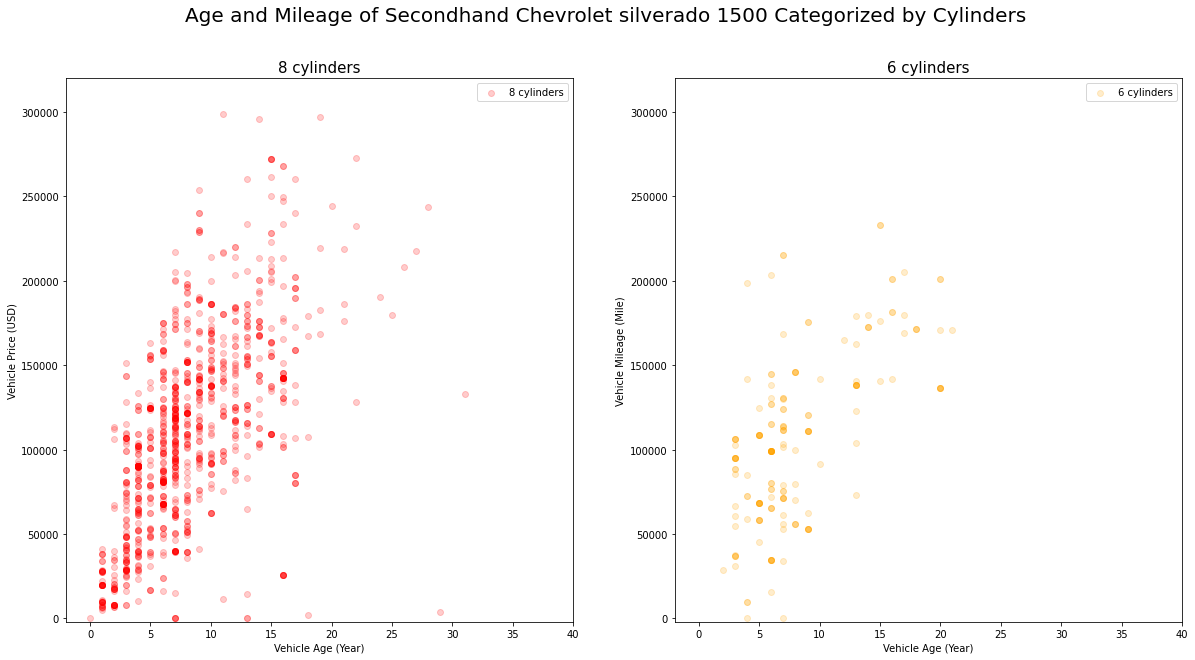

In [52]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
colors = {'8 cylinders':'red', '6 cylinders':'orange'}
fig.suptitle("Age and Mileage of Secondhand Chevrolet silverado 1500 Categorized by Cylinders", fontsize=20)
axs[0].scatter(x="age", y="odometer",data=df[df["cylinders"]=="8 cylinders"],\
            color=colors["8 cylinders"],alpha=0.2)
axs[0].set_title('8 cylinders', fontsize=15)
axs[0].set_xlabel("Vehicle Age (Year)", fontsize=10)
axs[0].set_ylabel("Vehicle Price (USD)", fontsize=10)
axs[0].set_xlim([-2,40])
axs[0].set_ylim([-2000,320000])
axs[0].legend(["8 cylinders"],loc="upper right", fontsize=10)
axs[1].scatter(x="age", y="odometer",data=df[df["cylinders"]=="6 cylinders"],\
            color=colors["6 cylinders"],alpha=0.2)
axs[1].set_title('6 cylinders', fontsize=15)
axs[1].set_xlabel("Vehicle Age (Year)", fontsize=10)
axs[1].set_ylabel("Vehicle Mileage (Mile)", fontsize=10)
axs[1].set_xlim([-2,40])
axs[1].set_ylim([-2000,320000])
axs[1].legend(["6 cylinders"],loc="upper right", fontsize=10)

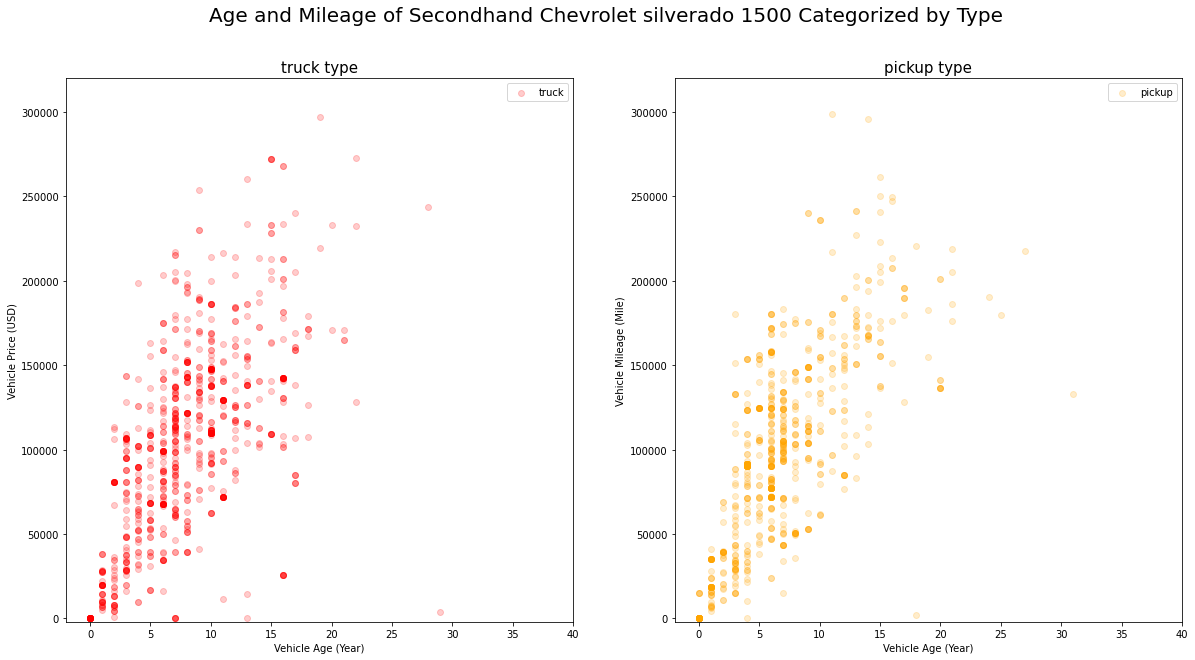

In [53]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
colors = {'truck':'red', 'pickup':'orange'}
fig.suptitle("Age and Mileage of Secondhand Chevrolet silverado 1500 Categorized by Type", fontsize=20)
axs[0].scatter(x="age", y="odometer",data=df[df["type"]=="truck"],\
            color=colors["truck"],alpha=0.2)
axs[0].set_title('truck type', fontsize=15)
axs[0].set_xlabel("Vehicle Age (Year)", fontsize=10)
axs[0].set_ylabel("Vehicle Price (USD)", fontsize=10)
axs[0].set_xlim([-2,40])
axs[0].set_ylim([-2000,320000])
axs[0].legend(["truck"],loc="upper right", fontsize=10)
axs[1].scatter(x="age", y="odometer",data=df[df["type"]=="pickup"],\
            color=colors["pickup"],alpha=0.2)
axs[1].set_title('pickup type', fontsize=15)
axs[1].set_xlabel("Vehicle Age (Year)", fontsize=10)
axs[1].set_ylabel("Vehicle Mileage (Mile)", fontsize=10)
axs[1].set_xlim([-2,40])
axs[1].set_ylim([-2000,320000])
axs[1].legend(["pickup"],loc="upper right", fontsize=10)

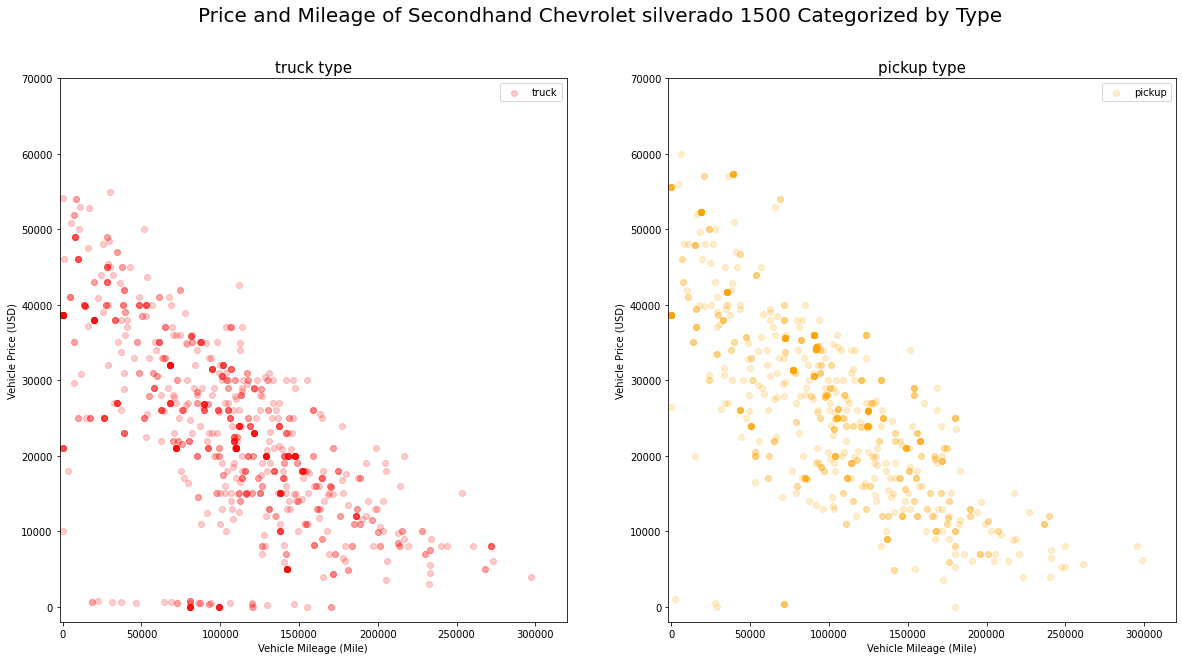

In [54]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
colors = {'truck':'red', 'pickup':'orange'}
fig.suptitle("Price and Mileage of Secondhand Chevrolet silverado 1500 Categorized by Type", fontsize=20)
axs[0].scatter(x="odometer", y="price",data=df[df["type"]=="truck"],\
            color=colors["truck"],alpha=0.2)
axs[0].set_title('truck type', fontsize=15)
axs[0].set_xlabel("Vehicle Mileage (Mile)", fontsize=10)
axs[0].set_ylabel("Vehicle Price (USD)", fontsize=10)
axs[0].set_xlim([-2000,320000])
axs[0].set_ylim([-2000,70000])
axs[0].legend(["truck"],loc="upper right", fontsize=10)
axs[1].scatter(x="odometer", y="price",data=df[df["type"]=="pickup"],\
            color=colors["pickup"],alpha=0.2)
axs[1].set_title('pickup type', fontsize=15)
axs[1].set_xlabel("Vehicle Mileage (Mile)", fontsize=10)
axs[1].set_ylabel("Vehicle Price (USD)", fontsize=10)
axs[1].set_xlim([-2000,320000])
axs[1].set_ylim([-2000,70000])
axs[1].legend(["pickup"],loc="upper right", fontsize=10)

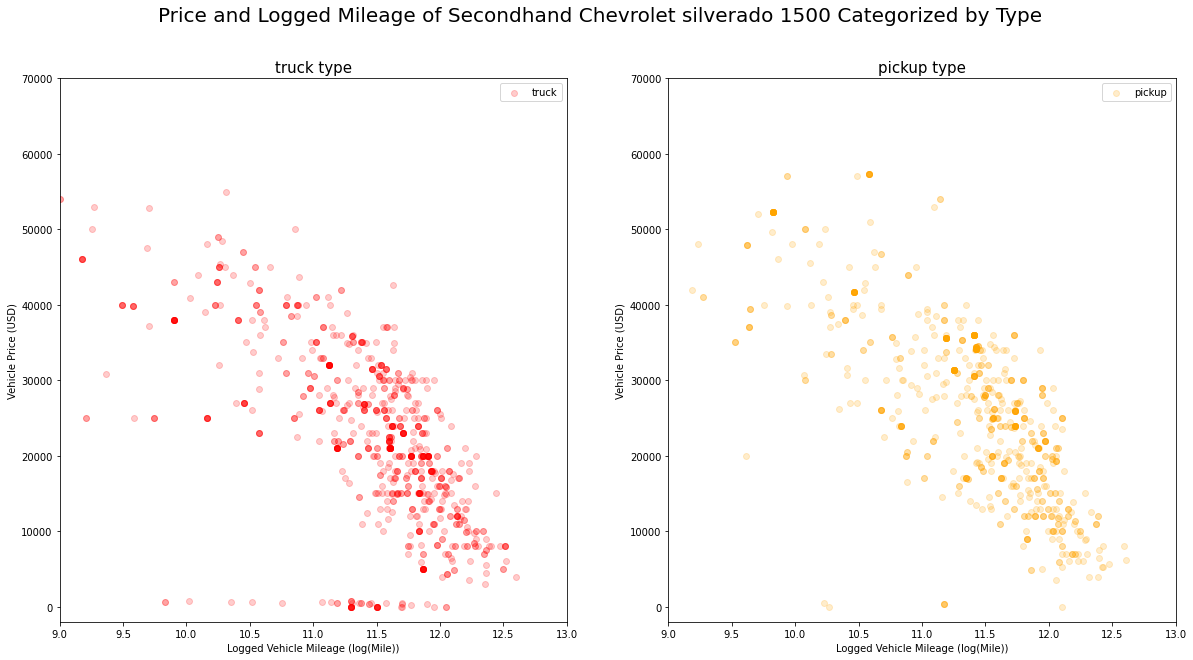

In [55]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
colors = {'truck':'red', 'pickup':'orange'}
fig.suptitle("Price and Logged Mileage of Secondhand Chevrolet silverado 1500 Categorized by Type", fontsize=20)
axs[0].scatter(x=np.log(df[df["type"]=="truck"]["odometer"]), y="price",data=df[df["type"]=="truck"],\
            color=colors["truck"],alpha=0.2)
axs[0].set_title('truck type', fontsize=15)
axs[0].set_xlabel("Logged Vehicle Mileage (log(Mile))", fontsize=10)
axs[0].set_ylabel("Vehicle Price (USD)", fontsize=10)
axs[0].set_xlim([9,13])
axs[0].set_ylim([-2000,70000])
axs[0].legend(["truck"],loc="upper right", fontsize=10)
axs[1].scatter(x=np.log(df[df["type"]=="pickup"]["odometer"]), y="price",data=df[df["type"]=="pickup"],\
            color=colors["pickup"],alpha=0.2)
axs[1].set_title('pickup type', fontsize=15)
axs[1].set_xlabel("Logged Vehicle Mileage (log(Mile))", fontsize=10)
axs[1].set_ylabel("Vehicle Price (USD)", fontsize=10)
axs[1].set_xlim([9,13])
axs[1].set_ylim([-2000,70000])
axs[1].legend(["pickup"],loc="upper right", fontsize=10)

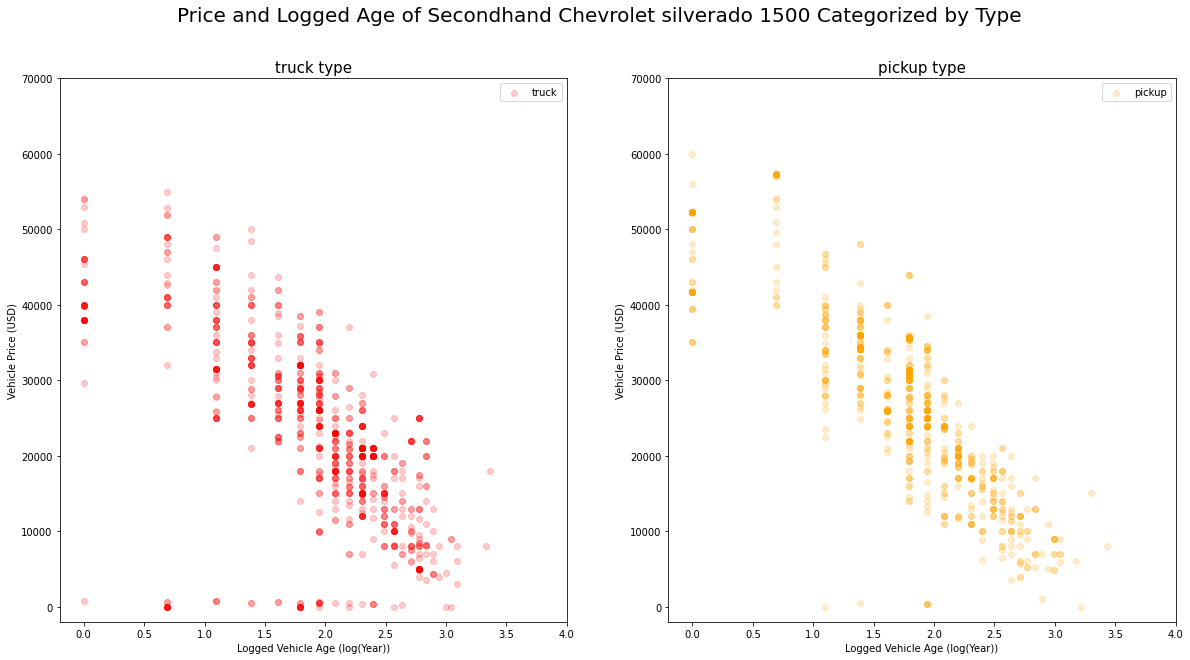

In [56]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
colors = {'truck':'red', 'pickup':'orange'}
fig.suptitle("Price and Logged Age of Secondhand Chevrolet silverado 1500 Categorized by Type", fontsize=20)
axs[0].scatter(x=np.log(df[df["type"]=="truck"]["age"]), y="price",data=df[df["type"]=="truck"],\
            color=colors["truck"],alpha=0.2)
axs[0].set_title('truck type', fontsize=15)
axs[0].set_xlabel("Logged Vehicle Age (log(Year))", fontsize=10)
axs[0].set_ylabel("Vehicle Price (USD)", fontsize=10)
axs[0].set_xlim([-0.2,4])
axs[0].set_ylim([-2000,70000])
axs[0].legend(["truck"],loc="upper right", fontsize=10)
axs[1].scatter(x=np.log(df[df["type"]=="pickup"]["age"]), y="price",data=df[df["type"]=="pickup"],\
            color=colors["pickup"],alpha=0.2)
axs[1].set_title('pickup type', fontsize=15)
axs[1].set_xlabel("Logged Vehicle Age (log(Year))", fontsize=10)
axs[1].set_ylabel("Vehicle Price (USD)", fontsize=10)
axs[1].set_xlim([-0.2,4])
axs[1].set_ylim([-2000,70000])
axs[1].legend(["pickup"],loc="upper right", fontsize=10)